# Trees

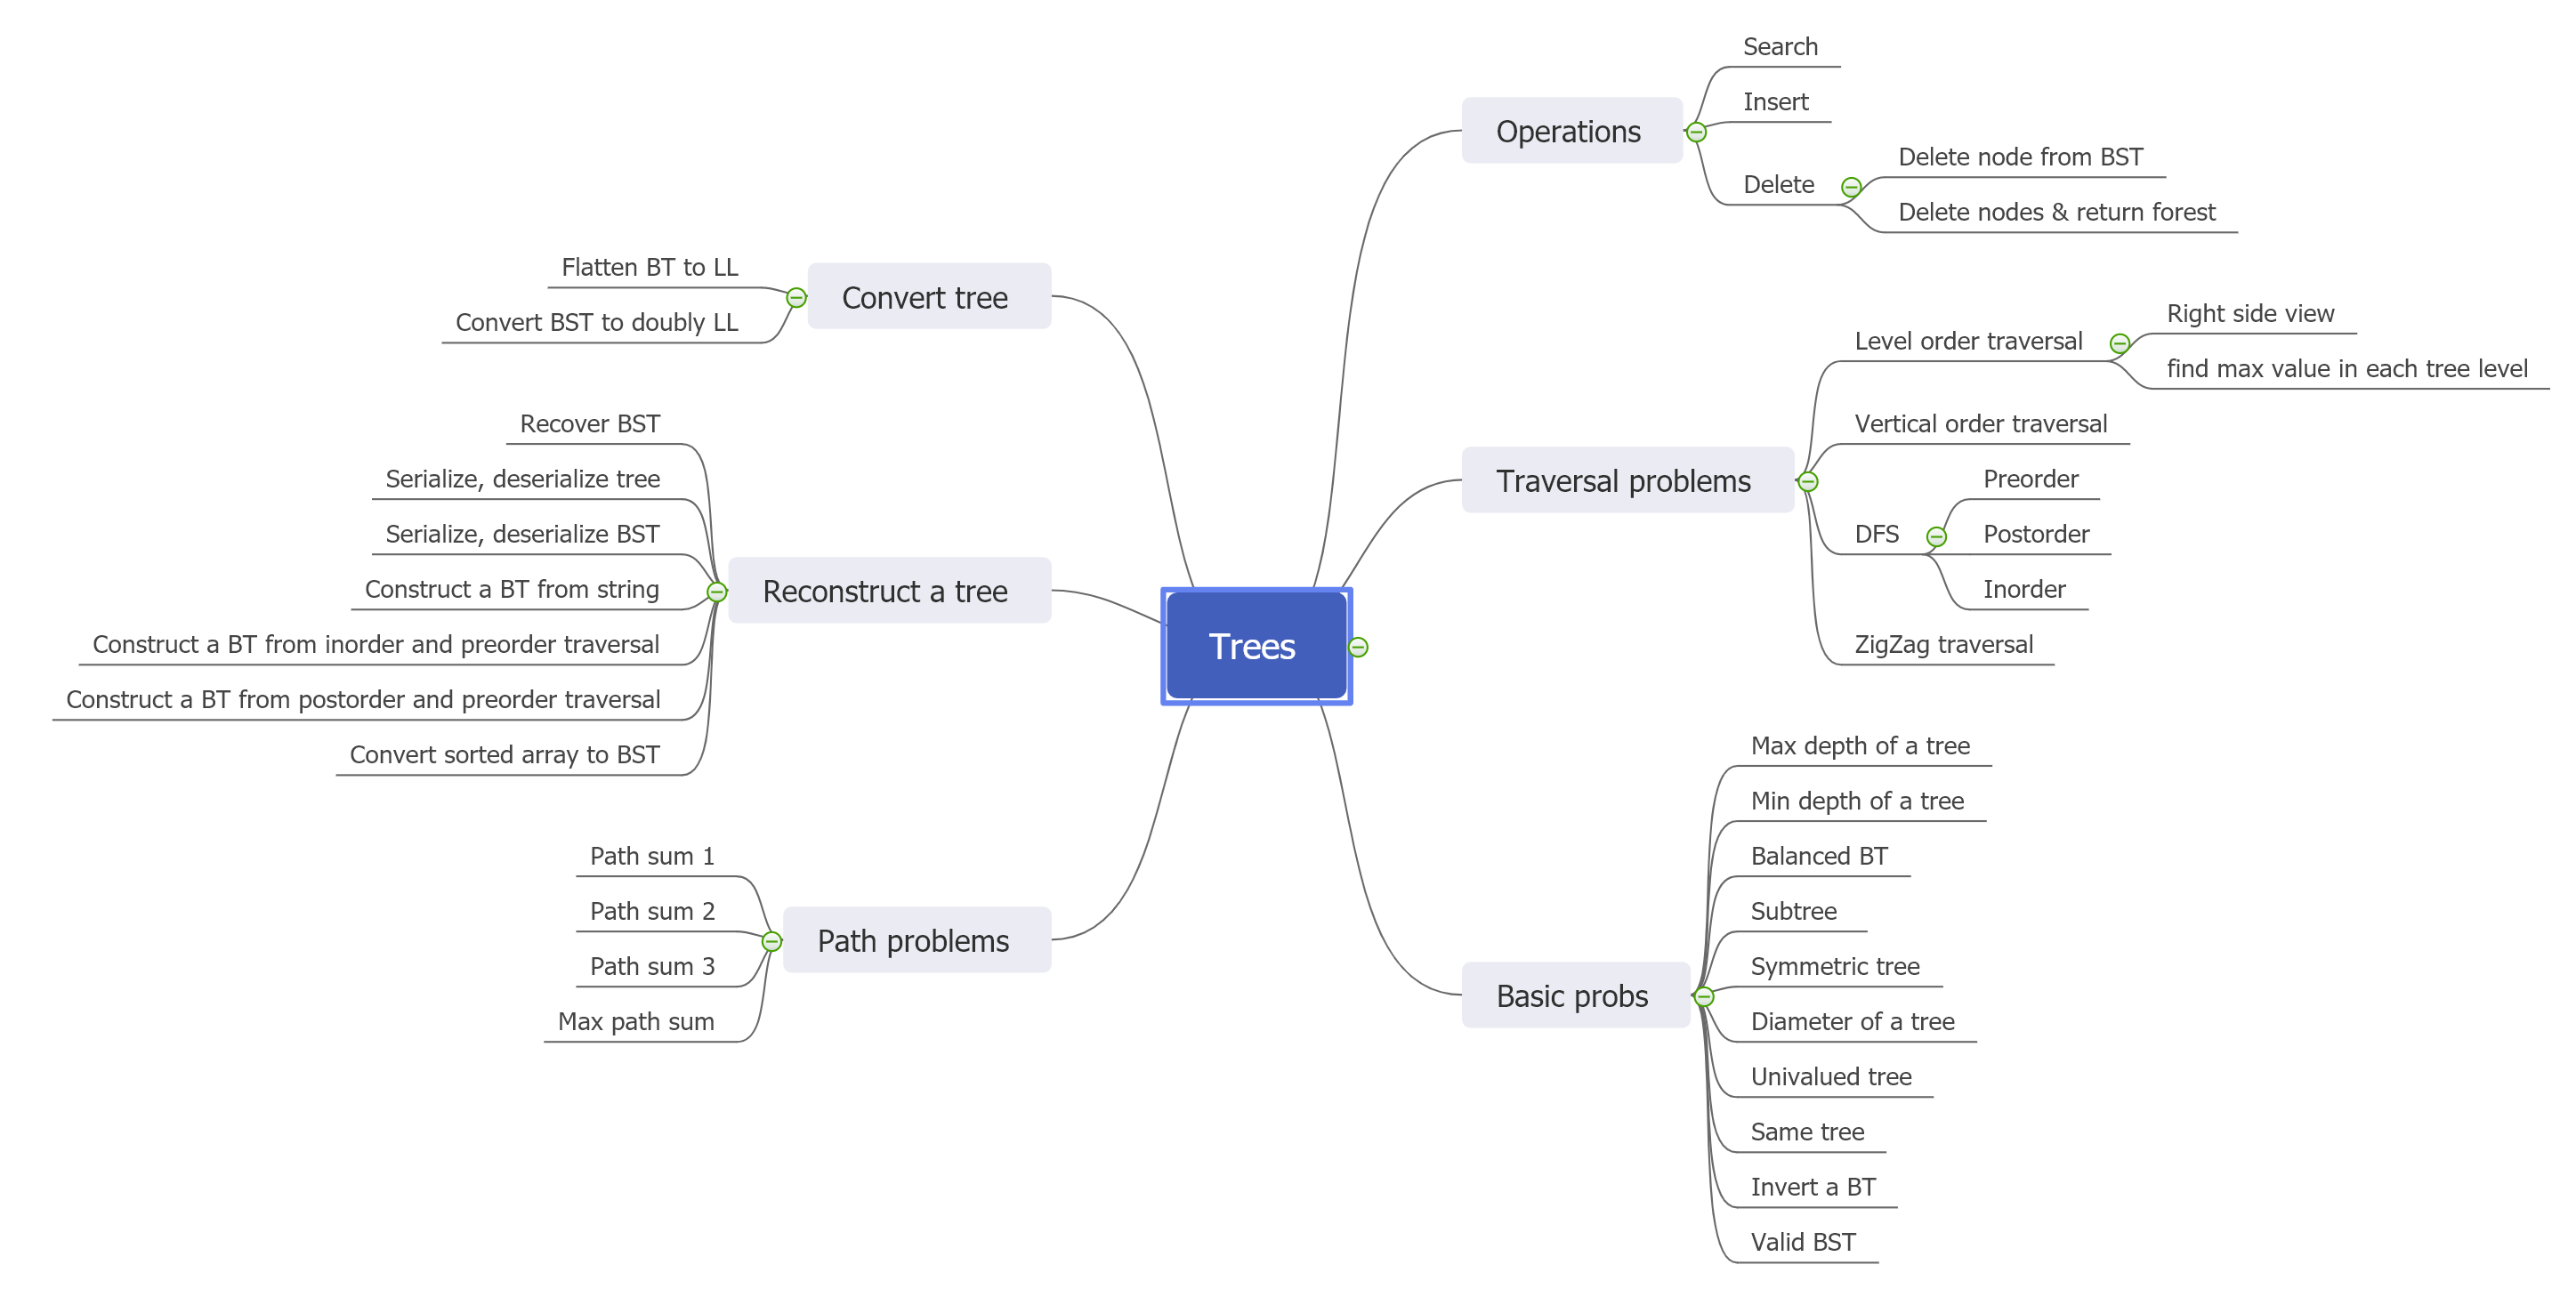

#### How to solve any tree problem?

Most of the binary tree problems can be solved in four steps(Split and Combine):
1. Work on the current(root) node, also called as base case.
2. Process the left sub-tree recursively.
3. Process the right sub-tree recursively.
4. Combine/Merge/choose the results from left sub-tree and right sub-tree

Steps 1-3 are split steps and step 4 combine step.

Lets understand with the help of an example:
Suppose we need to calculate the height of a tree:
Let the function be
```python
def findHeight(root):

    // do something
```

**Step 1: Work on the current node**
```python
def findHeight(root):

        if not root:
               return 0;

        return 1 + // do something(in the next seps)
```

**Step 2: Process the left sub-tree**
```python
def findHeight(root)

        if not root:
           return 0;

        return 1 + findHeight(root.left),  // do something(in the next seps)

```
**Step 3: Process the right sub-tree**
```python
def findHeight(root)

        if not root:
           return 0;

        return 1 + findHeight(root.left),  findHeight(root.right)

```

**Step 4: The final height is given as maximum height from left sub-tree and right sub-tree plus 1**
```python
def findHeight(root)

        if not root:
           return 0;

        return 1 + max(findHeight(root.left),  findHeight(root.right))

```

## Operations

### Search in a BST

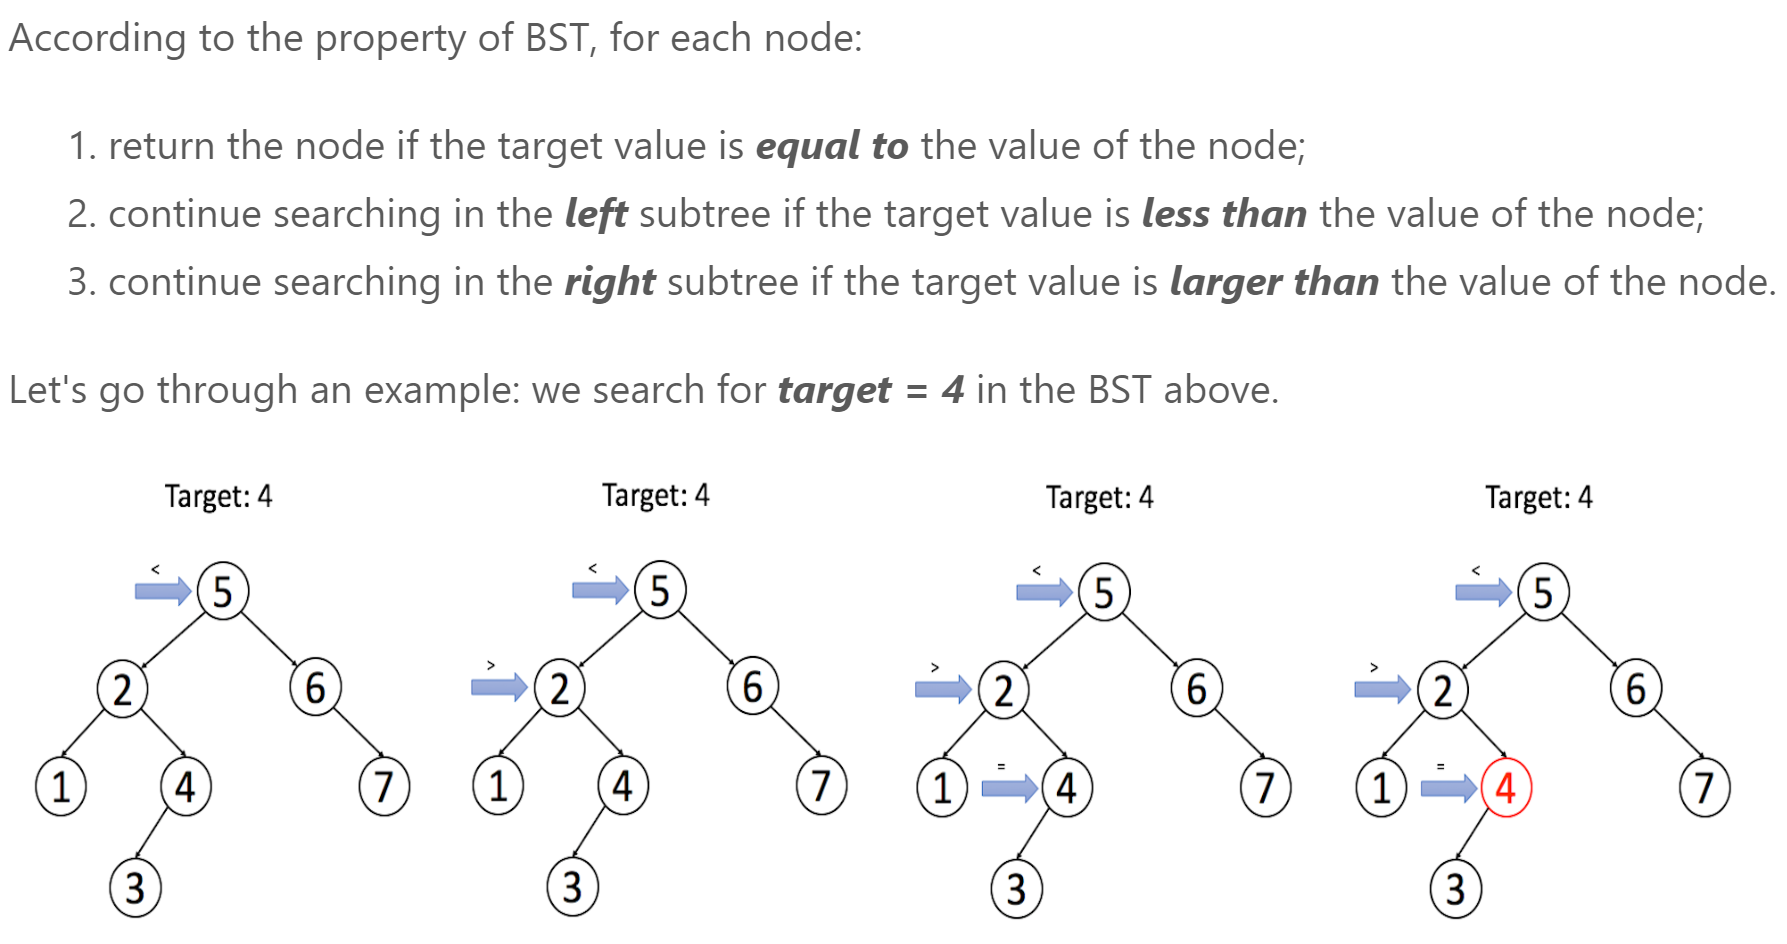

**Recursion solution**

In [ ]:
def searchBST(self, root: TreeNode, val: int) -> TreeNode:
    # TC: O(logN)
    # SC: O(N)

    # step 1
    if not root or val == root.val:
        return root
    # step 2
    elif val < root.val:
        return self.searchBST(root.left, val)
    # step 3
    else:
        return self.searchBST(root.right, val)

**Iterative solution**

In [ ]:
def searchBST(self, root: TreeNode, val: int) -> TreeNode:
    # TC: O(logN), SC: O(1) (no recursive stack)
    curr = root

    while curr and curr.val != val:
        # 1. val is less than root, move to left subtree
        if val < curr.val:
            curr = curr.left
        # 2. Val is greater than root, move to right subtree
        else:
            curr = curr.right
    return curr

### Insertion in a BST


1. Start from the root node
2. Check if the value to be inserted is greater than the root/current node’s value
3. If yes, then repeat the steps above for the right subtree, otherwise repeat the steps above for the left sub-tree of the current node.
4. Repeat until you find a node that has no right/left child to move onto. Insert the given value there and update the parent node accordingly.

**Approach: Recursive**

In [ ]:
class Solution:
    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return TreeNode(val)

        if val > root.val:
            # insert into the right subtree
            root.right = self.insertIntoBST(root.right, val)
        else:
            # insert into the left subtree
            root.left = self.insertIntoBST(root.left, val)
        return root

**Approach: Iterative**

In [ ]:
class Solution:
    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        node = root
        while node:
            # insert into the right subtree
            if val > node.val:
                # if no right subtree then insert right now
                if not node.right:
                    node.right = TreeNode(val)
                    return root
                # move right
                else:
                    node = node.right
            # if val is less than root, insert into the left subtree
            else:
                # if no left subtree then insert in right now
                if not node.left:
                    node.left = TreeNode(val)
                    return root
                else:
                    node = node.left
        return TreeNode(val)

### Deletion in a BST
case 1. If the target node has no child, we can simply remove the node.  
case 2. If the target node has one child, we can use its child to replace itself.  
case 3. If the target node has two children, replace the node with its in-order successor or predecessor node and delete that node.

**Algorithm:**

If ```key > root.val``` then delete the node to delete is in the right subtree ```root.right = deleteNode(root.right, key)```.

If ```key < root.val``` then delete the node to delete is in the left subtree ```root.left = deleteNode(root.left, key)```.

If ```key == root.val``` then the node to delete is right here. Let's do it :

If the node is a leaf, the delete process is straightforward : ```root = null```.

If the ```node is not a leaf and has the right child```, then replace the node value by a successor value ```root.val = successor.val```, and then recursively delete the successor in the right subtree ```root.right = deleteNode(root.right, root.val)```.

If the ```node is not a leaf and has only the left child```, then replace the node value by a predecessor value ```root.val = predecessor.val```, and then recursively delete the predecessor in the left subtree ```root.left = deleteNode(root.left, root.val)```.

Return ```root```.

**Time complexity : O(logN)  
Space complexity: O(logN)**

In [ ]:
class Solution:
    def successor(self, root):
        """
        One step right and then always left
        """
        root = root.right
        while root.left:
            root = root.left
        return root.val

    def predecessor(self, root):
        """
        One step left and then always right
        """
        root = root.left
        while root.right:
            root = root.right
        return root.val

    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if not root:
            return None

        # delete from the right subtree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        # delete from the left subtree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        # delete the current node
        else:
            # the node is a leaf
            if not (root.left or root.right):
                root = None
            # the node is not a leaf and has a right child
            elif root.right:
                root.val = self.successor(root)
                root.right = self.deleteNode(root.right, root.val)
            # the node is not a leaf, has no right child, and has a left child
            else:
                root.val = self.predecessor(root)
                root.left = self.deleteNode(root.left, root.val)

        return root

## Implementation of BST

In [ ]:
class Node:
    def __init__(self, val):
        self.leftchild = None
        self.val = val
        self.rightchild = None

    def insert(self, val):
        '''
        Recursive approach
        '''
        if val < self.val:
            if self.leftchild:
                self.leftchild.insert(val)
            else:
                self.leftchild = Node(val)
                return
        else:
            if self.rightchild:
                self.rightchild.insert(val)
            else:
                self.rightchild = Node(val)
                return

        '''
        Iterative approach
        '''
        current = self
        parent = None
        # traversal to left leaf node
        while current:
            parent = current
            if val < current.val:
                # move current to left child
                current = current.leftchild
            else:
                # move current to right child
                current = current.rightchild

        # insertion
        if parent == None:
            parent = Node(val)
        elif val < parent.val:
            parent.leftchild = Node(val)

        else:
            parent.rightchild = Node(val)

    def search(self, val):
        '''
        Iterative
        '''
        current = self

        while current != None:
            if val < current.val:
                current = current.leftchild
            elif val > current.val:
                current = current.rightchild
            else:
                return True

        return False

        '''
        Recursive
        '''
        if val < self.val:
            if self.leftchild:
                return self.leftchild.search(val)
            else:
                return False
        elif val > self.val:
            if self.rightchild:
                return self.rightchild.search(val)
            else:
                return False
        else:
            return True
        return False

    def delete(self, val):

        if val < self.val:
            if self.leftchild:
                self.leftchild = self.leftchild.delete(val)
            else:
                print("Not in the tree")
        elif val > self.val:
            if self.rightchild:
                self.rightchild = self.rightchild.delete(val)
            else:
                print("Not in the tree")
        else:
            # 1. Delete a leaf node
            if self.leftchild is None and self.rightchild is None:
                # Delete a node with one child
                # Delete a node with two childs


class binary_search_tree(self, root):
    def __init__(self, val):
        self.root = Node(val)

    def insert(self, val):
        if self.root:
            self.root.insert(val)
        else:
            self.root = Node(val)
            return True

    def search(self, val):
        if self.root:
            return self.root.search(val)
        else:
            return False

    def delete(self, val):
        if self.root:
            return self.root.delete(val)
        else:
            return False

## Traversal algos

1. Breadth first search (Level order traversal)
2. Depth first search 
    * Preorder 
    * Inorder
    * Postorder

### Breadth first search in a tree (Level order traversal) 

**Approach 1: Iterative**

In [1]:
from collections import deque
# deques are implemented using doubly linked lists. Effecient over lists as popleft() is O(1). With lists pop(0) is O(N)
# https://www.geeksforgeeks.org/deque-in-python/


def BFS(root):
    result = []
    if root is None:
        return result

    queue = deque()
    queue.append(root)

    while queue:
        levelSize = len(queue)
        currentLevel = []

        for _ in range(levelSize):
            currentNode = queue.popleft()
            # add the node to the current level
            currentLevel.append(currentNode.val)
            # insert the children of current node in the queue
            if currentNode.left:
                queue.append(currentNode.left)
            if currentNode.right:
                queue.append(currentNode.right)

        result.append(currentLevel)

**Approach 2: Recursive**

In [ ]:
def BFS(self, root: TreeNode) -> List[List[int]]:

    result = []
    if not root:
        return levels

    def helper(node, level):
        if len(result) == level:
            result.append([])
        # add node value to the list
        result[level].append(node.val)
        # Recursive call the left and right childs
        if node.left:
            helper(node.left, level + 1)
        if node.right:
            helper(node.right, level + 1)

    helper(root, 0)
    return result

### Depth first search

### Preorder traversal iterative

In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        stack = []
        stack.append(root)
        # Preorder -> root, left, right
        while stack:
            root = stack.pop()
            if root:
                # Add root to result
                res.append(root.val)
                # right node is added to the stack first because stack.pop() will give us left node O(1)
                # In other way, we can add left first but then we have to do stack.pop(0) which is O(N)
                # also, going by the definition of a stack LIFO, pop() is correct usage.
                stack.append(root.right)
                stack.append(root.left)

        return res

### [Inorder traversal iterative](https://leetcode.com/problems/binary-tree-inorder-traversal/)

In [ ]:
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        # left, root, right
        stack = []
        curr = root
        result = []
        while stack or curr:
            # root to left are appended to the stack
            if curr:
                stack.append(curr)
                curr = curr.left
            
            elif stack:
                poped_item = stack.pop()
                result.append(poped_item.val)
                curr = poped_item.right
            
        return result

### Postorder traversal iterative

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        stack = []

        result = []
        if not root:
            return None

        # 1. add root to stack_a
        stack.append(root)
        while stack:
            # 2. Pop from stack_a and push to stack_b
            root = stack.pop()
            result.append(root.val)
            # 3. If children exist. Push into stack_a
            if root.left:
                stack.append(root.left)
            if root.right:
                stack.append(root.right)
        
        return reversed(result)

## Binary tree problems (easy)

###  Max depth of a binary tree

**Using DFS**
* Time complexity: O(N)  
* Space complexity: O(N)

In [ ]:
# Same as finding the height of a tree.
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if root is None:
            return 0

        elif root.left is None and root.right is None:
            return 1

        else:
            left_tree_height = self.maxDepth(root.left)
            right_tree_height = self.maxDepth(root.right)

            return max(left_tree_height, right_tree_height) + 1

**Using BFS**  
* Time complexity: O(N)  
* Space complexity: O(N)

In [ ]:
def find_maximum_depth(root):
    if root is None:
        return 0

    queue = deque()
    queue.append(root)
    maximumTreeDepth = 0
    while queue:
        maximumTreeDepth += 1
        levelSize = len(queue)
        for _ in range(levelSize):
            currentNode = queue.popleft()

            # insert the children of current node in the queue
            if currentNode.left:
                queue.append(currentNode.left)
            if currentNode.right:
                queue.append(currentNode.right)

    return maximumTreeDepth

### Min depth of a binary tree

**Using BFS**  
* Keep track of the depth of the tree. As soon as we find our first leaf node, that level will represent the minimum depth of the tree.  
* Time complexity: O(N)  
* Space complexity: O(N)

In [ ]:
def find_minimum_depth(root):
    if root is None:
        return 0

    queue = deque()
    queue.append(root)
    minimumTreeDepth = 0
    while queue:
        minimumTreeDepth += 1
        levelSize = len(queue)
        for _ in range(levelSize):
            currentNode = queue.popleft()

            # check if this is a leaf node
            if not currentNode.left and not currentNode.right:
                return minimumTreeDepth

            # insert the children of current node in the queue
            if currentNode.left:
                queue.append(currentNode.left)
            if currentNode.right:
                queue.append(currentNode.right)

### [Maximum Depth of N-ary Tree](https://leetcode.com/problems/maximum-depth-of-n-ary-tree/)

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children
"""
class Solution:
    def maxDepth(self, root: 'Node') -> int:
        
        # base case 
        if root is None:
            return 0
        
        # only root node
        elif root.children == []:
            return 1
        
        # has children
        else:
            height = [self.maxDepth(c) for c in root.children]
            return max(height) + 1
        

### [Subtree of Another Tree](https://leetcode.com/problems/subtree-of-another-tree/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def isSubtree(self, s: TreeNode, t: TreeNode) -> bool:
        
        ## RC ##
        ## APPROACH : RECURSION ##
        def isSame(x,y):
            if(x is None and y is None):
                return True
            if(x is None or y is None):
                return False

            return (x.val == y.val) and isSame(x.left, y.left) and isSame(x.right, y.right)
        
        if(s is None): return False
        
        return isSame(s,t) or self.isSubtree(s.left,t) or self.isSubtree(s.right,t)

### [Balanced binary tree]()

In [ ]:
class Solution:
    def isBalanced(self, root: TreeNode) -> bool:
        def findHeight(root):

            if not root:
                return 0

            return 1 + max(findHeight(root.left), findHeight(root.right))

        if not root:
            return -1
        # sub trees have to be balanced and their height diff must be < 1
        return self.isBalanced(root.left) and self.isBalanced(
            root.right
        ) and abs(findHeight(root.left) - findHeight(root.right)) < 2

### Sum of Root To Leaf Binary Numbers
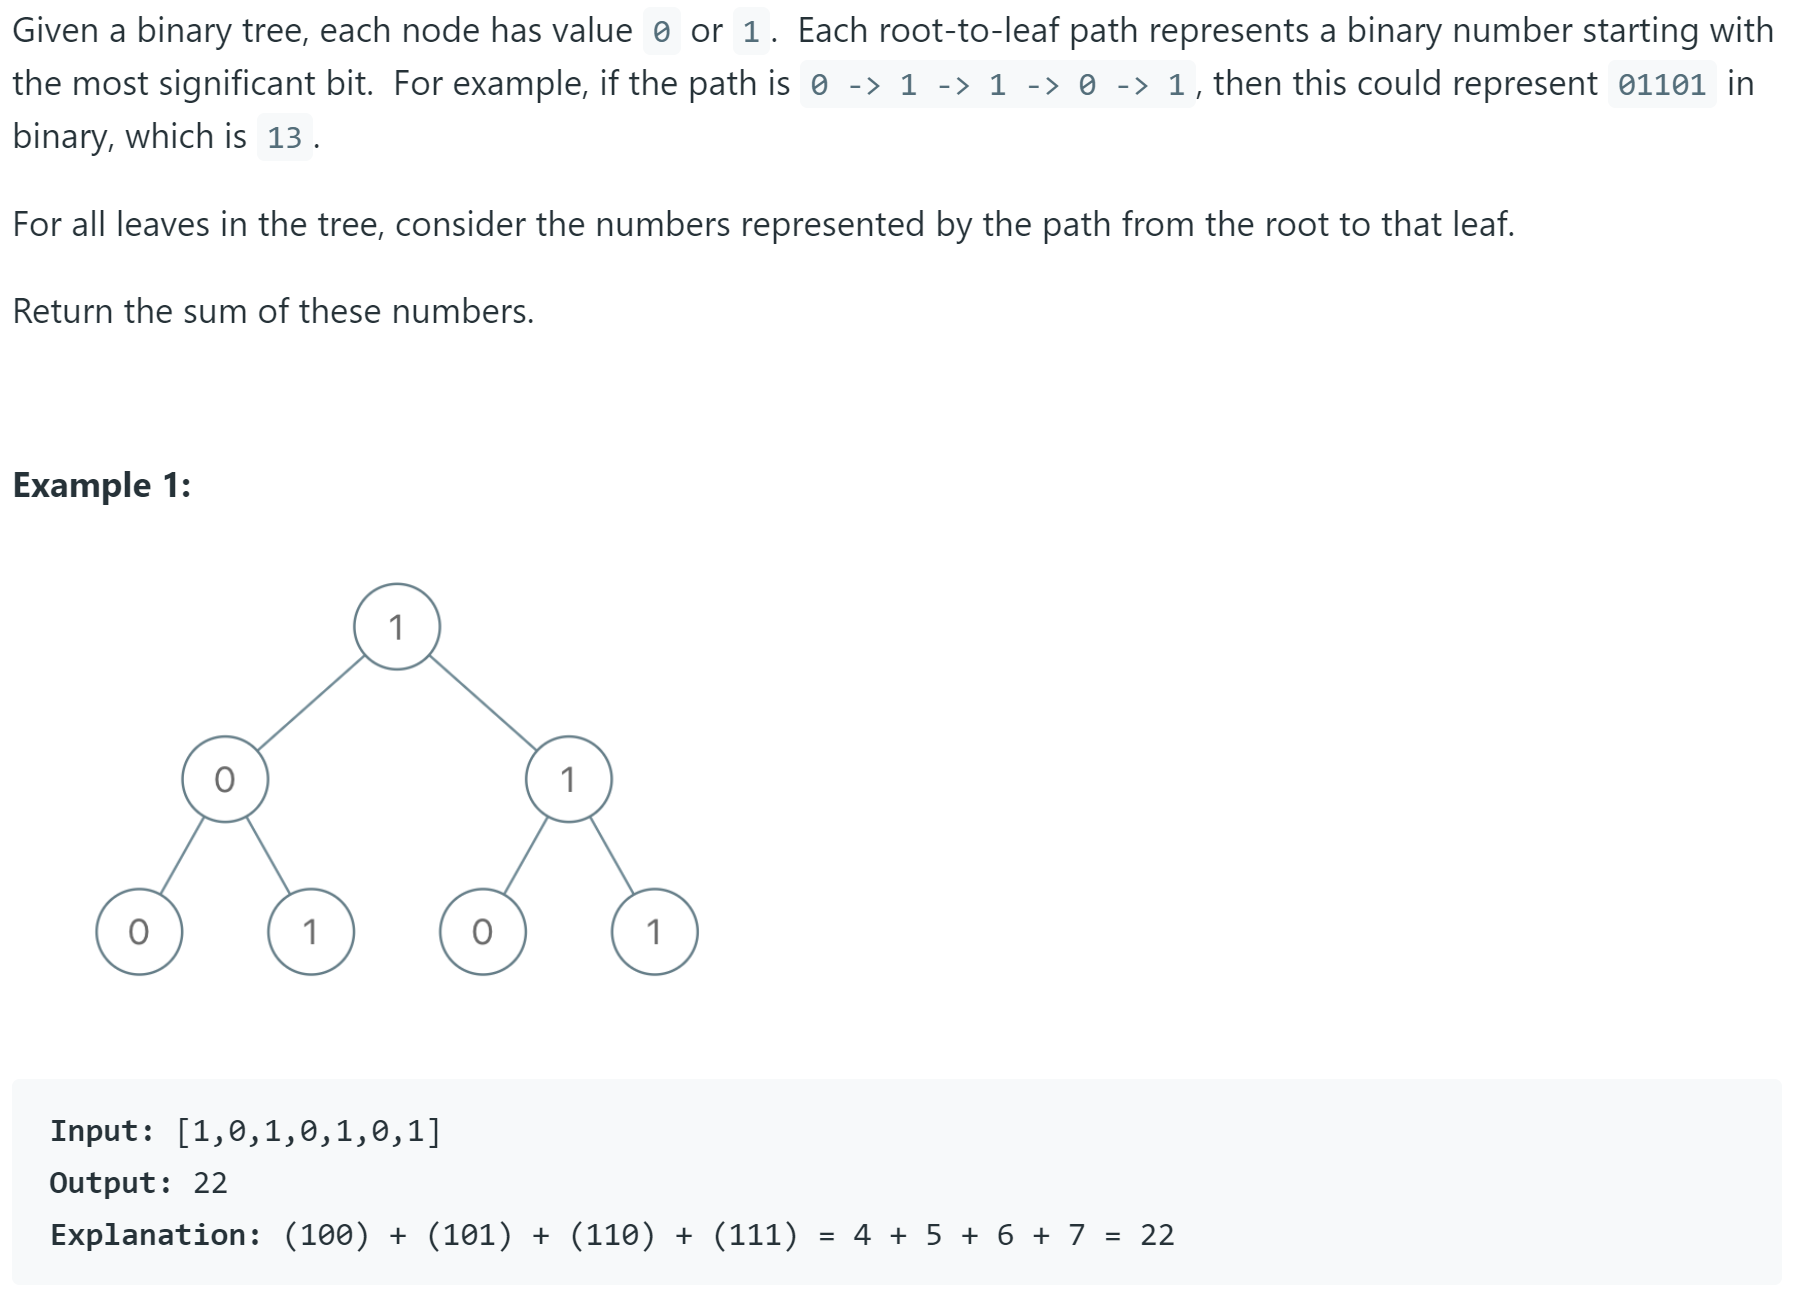

In [ ]:
class Solution:
    def sumRootToLeaf(self, root: TreeNode) -> int:
        res = []

        def dfs(root, path):
            if not root:
                return

            path += str(root.val)

            # leaf node
            if not root.left and not root.right:
                res.append(path)

            if root.left:
                dfs(root.left, path)
            if root.right:
                dfs(root.right, path)

        dfs(root, "")

        sum = 0
        for num in res:
            # to convert a binary string to decimal
            sum += int(num, 2)
        return sum

### [Convert Binary Number in a Linked List to Integer](https://leetcode.com/problems/convert-binary-number-in-a-linked-list-to-integer/)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getDecimalValue(self, head: ListNode) -> int:
        curr = head
        binary = ""
        while curr:
            
            binary += str(curr.val)
            curr = curr.next
        
        return int(binary, 2)
                
            
        

### Leaf-Similar Trees
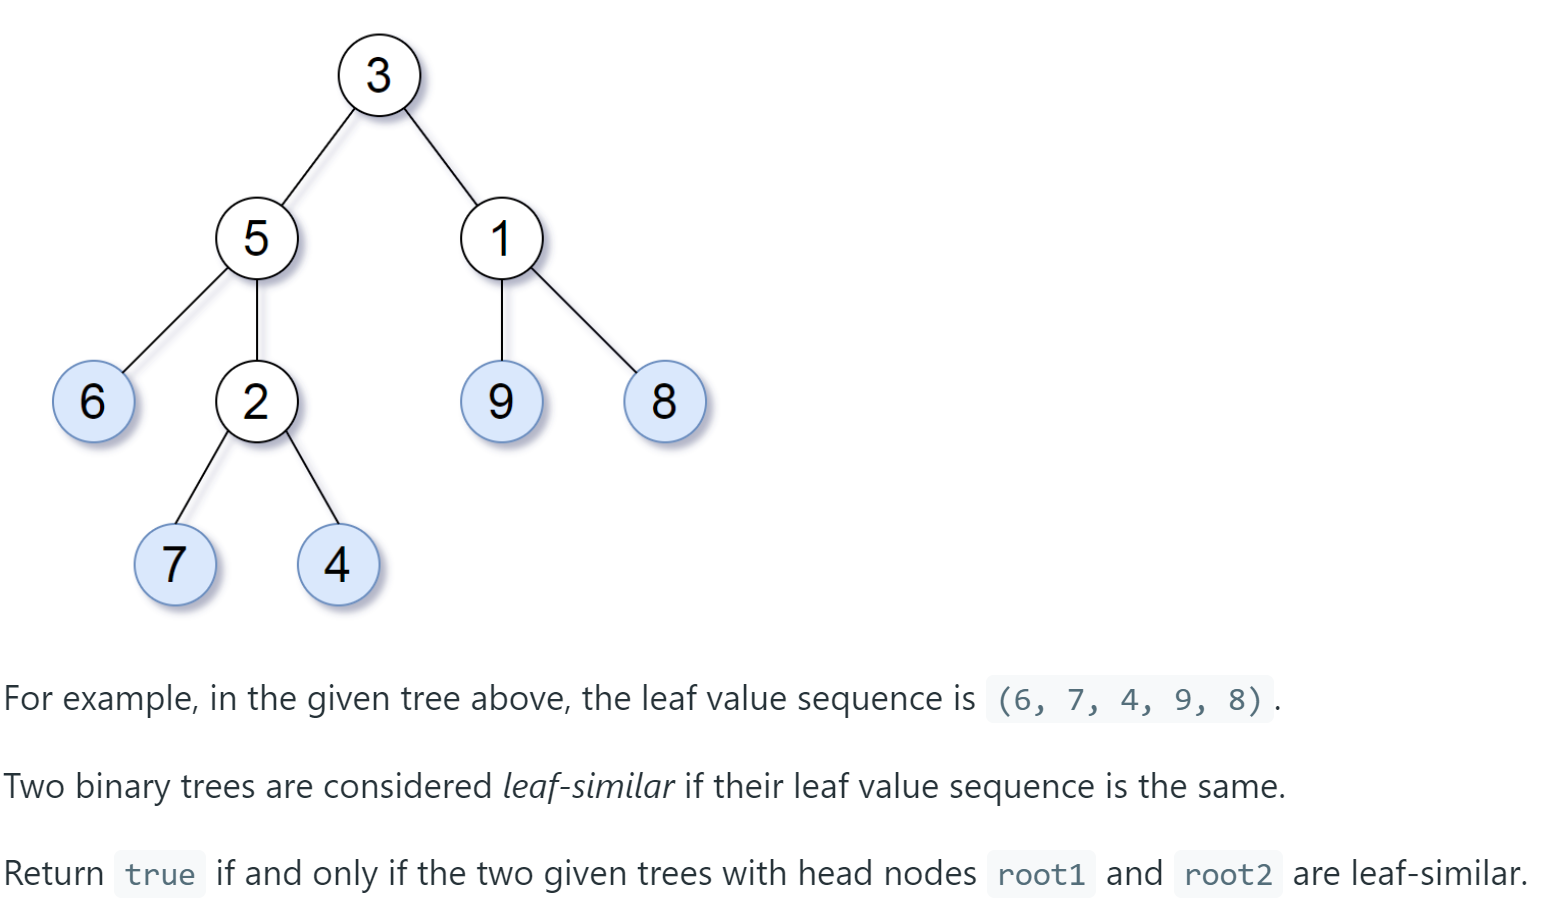

In [ ]:
class Solution:
    def leafSimilar(self, root1: TreeNode, root2: TreeNode) -> bool:
        # dfs
        if not root1 or not root2:
            return False

        def dfs(root):
            if not root:
                return []

            # when reached the leaf node, return the val as a list to concatenate each leaf node as a single list
            if not root.left and not root.right:
                return [root.val]

            # concatenate the leafs
            return dfs(root.left) + dfs(root.right)

        # if both trees have the same list then they have similar leaf node
        # comparing two lists takes O(N), likewise comparing two strings is also O(N)
        return dfs(root1) == (dfs(root2))

### [Same tree](https://leetcode.com/problems/same-tree/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        
        if not p and not q:
            return True
        if not q or not p:
            return False
        if p.val != q.val:
            return False
        
        return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
        

### Sum of left leaf nodes

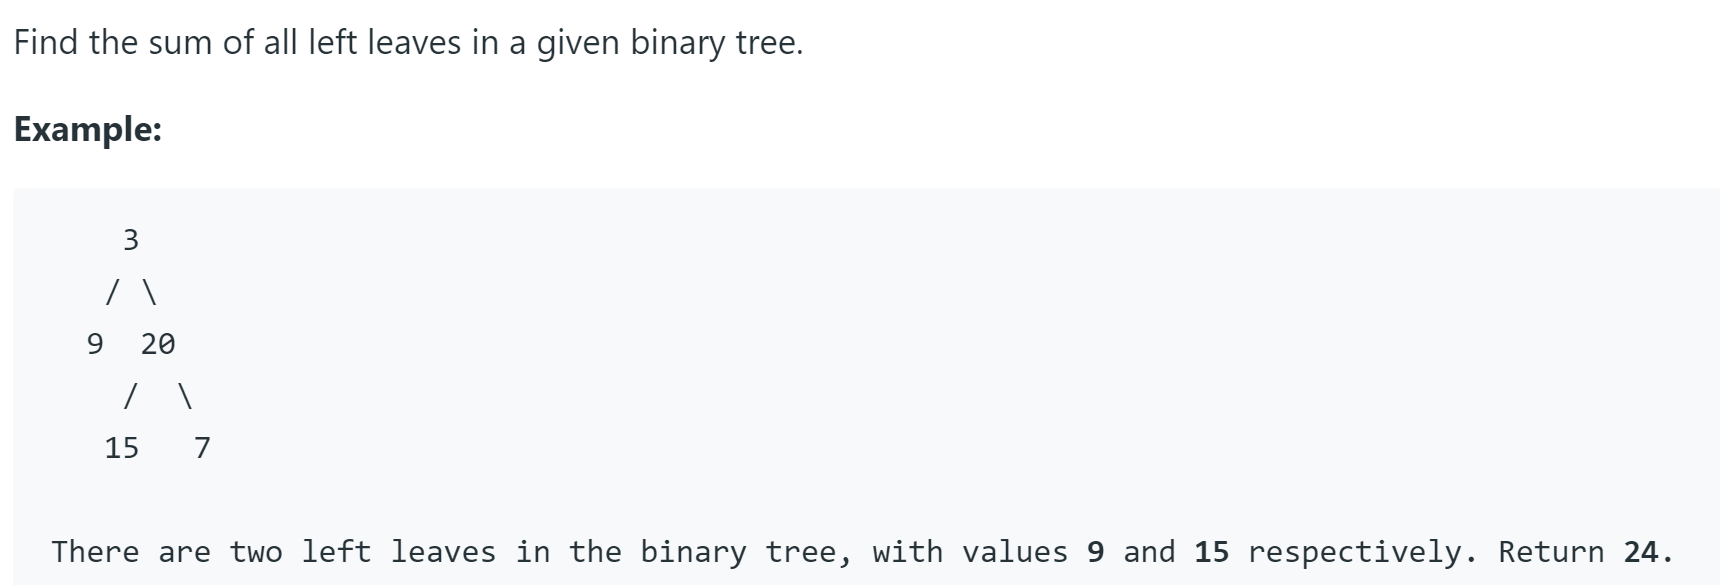

In [ ]:
class Solution:
    def sumOfLeftLeaves(self, root: TreeNode) -> int:
        # find left leaf
        # how to find a left leaf?
        # node.left.left and node.left.right are both None then node.left is a left leaf
        if not root:
            return 0
        self.sum = 0

        def dfs(node):
            if not node:
                return 0
            if node.left:
                if not node.left.left and not node.left.right:
                    self.sum += node.left.val

            if node.left:
                dfs(node.left)
            if node.right:
                dfs(node.right)

        dfs(root)
        return self.sum

### All paths from root to leaf

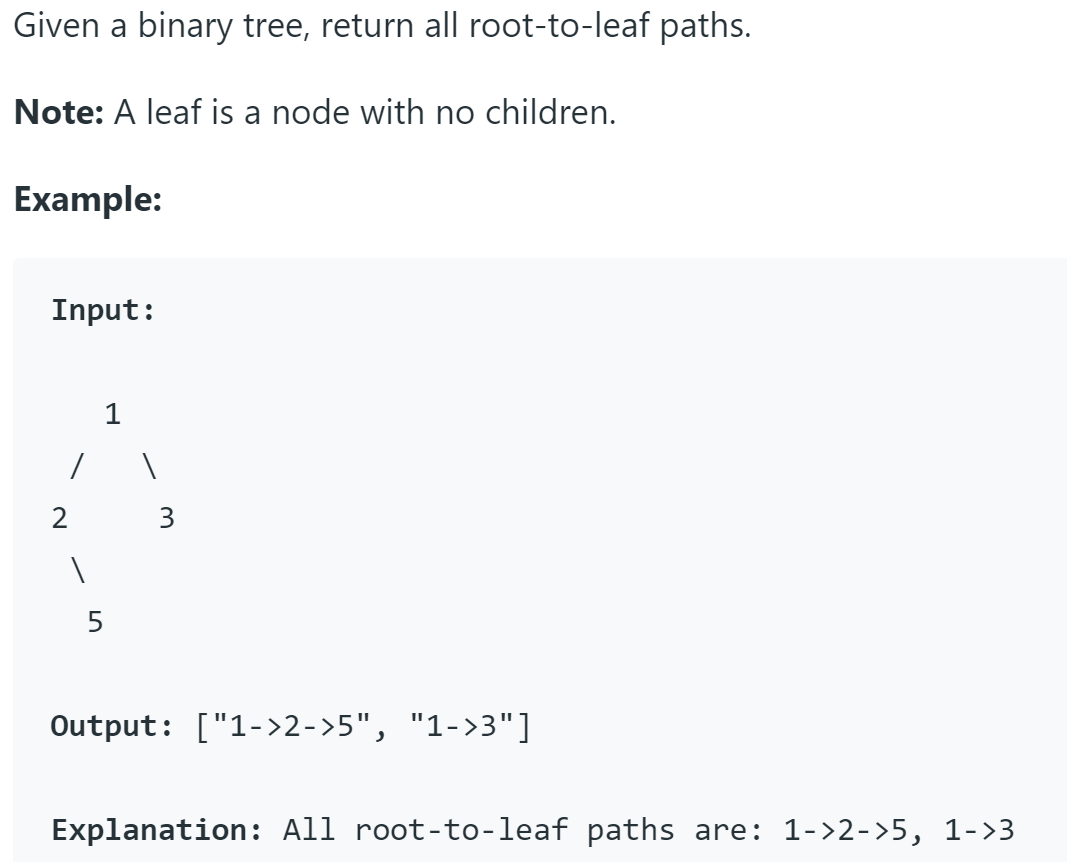

In [ ]:
class Solution:
    def binaryTreePaths(self, root: TreeNode) -> List[str]:
        if not root:
            return []
        # have to store the path
        self.paths = []

        def dfs(node, path):

            if not node:
                return

            # for root
            if not path:
                path += str(node.val)

            else:
                path += '->' + str(node.val)

            # when we reach the leaf, add the path
            if not node.left and not node.right:
                self.paths.append(path)

            if node.left:
                dfs(node.left, path)
            if node.right:
                dfs(node.right, path)

        dfs(root, "")
        return self.paths

### Minimum Absolute Difference in BST
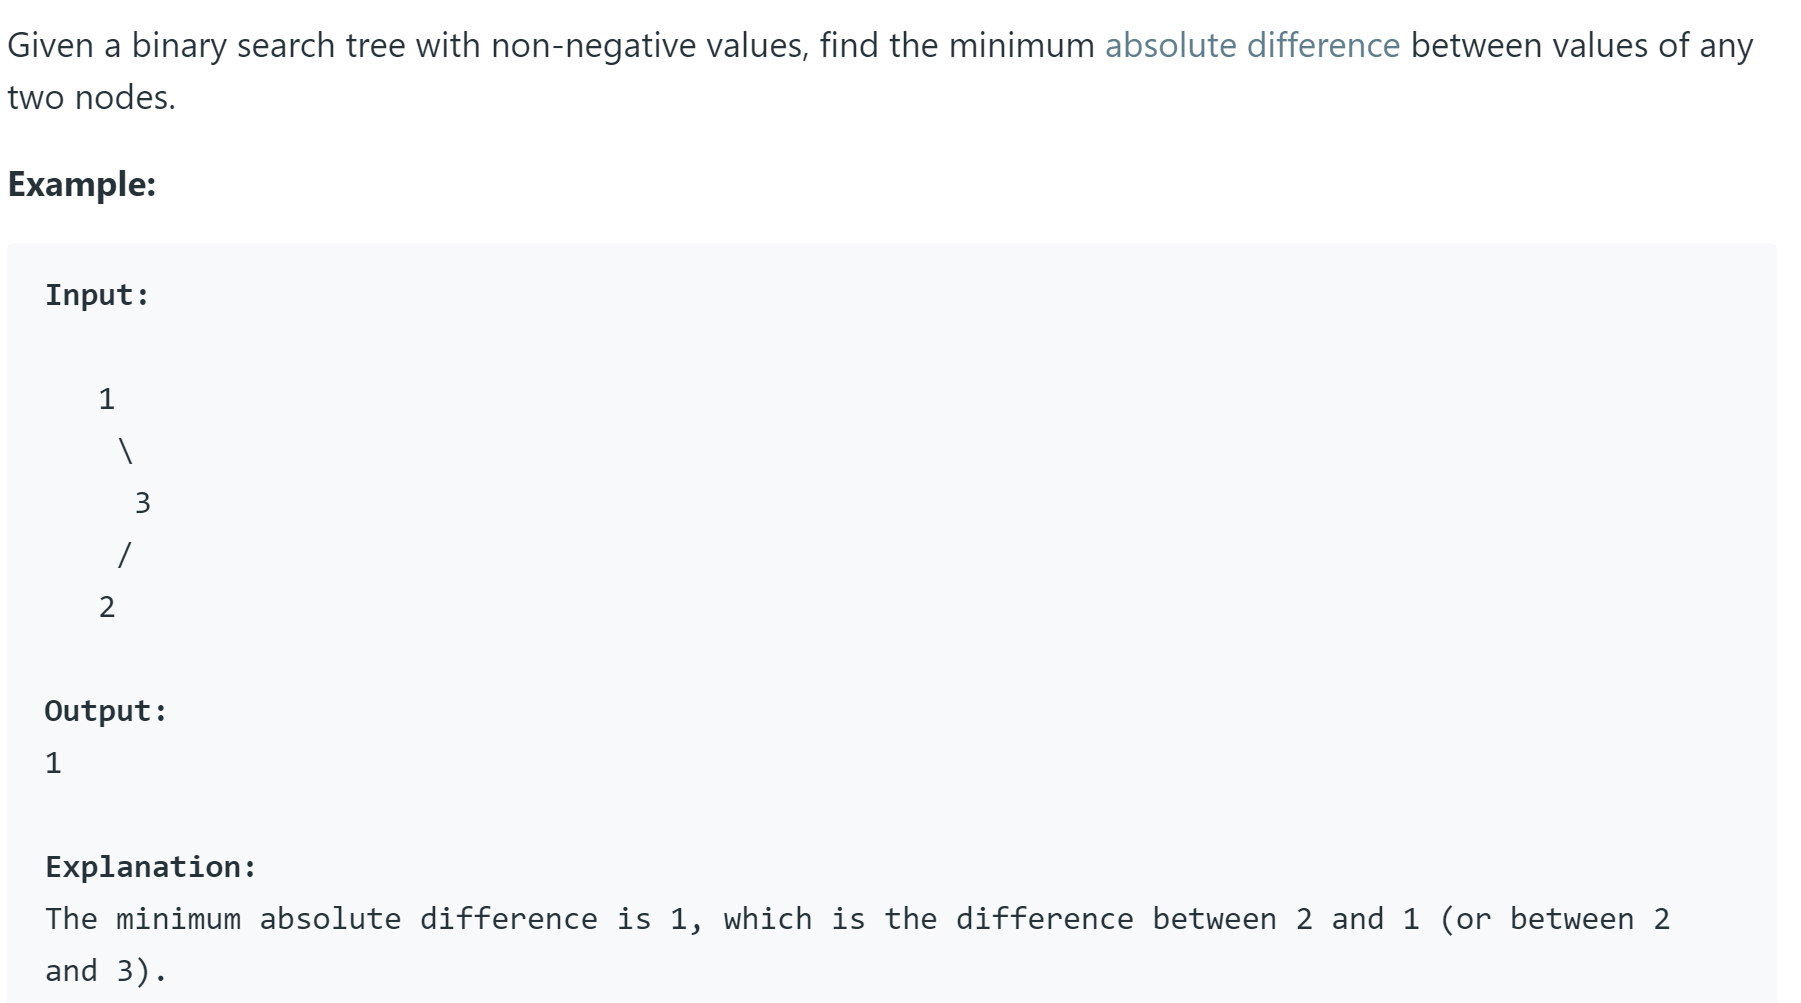

In [1]:
def minAbsDifference(root):
    self.minDiff = self.previous_val = float('inf')

    def inorder(root):
        if not root:
            return

        inorder(root.left)

        # main logic
        # the below logic works for inorder traversal only.

        self.minDiff = min(self.minDiff, abs(self.previous - root.val))
        self.previous = root.val

        inorder(root.right)

    inorder(root)
    return self.minDiff

### Level order successor

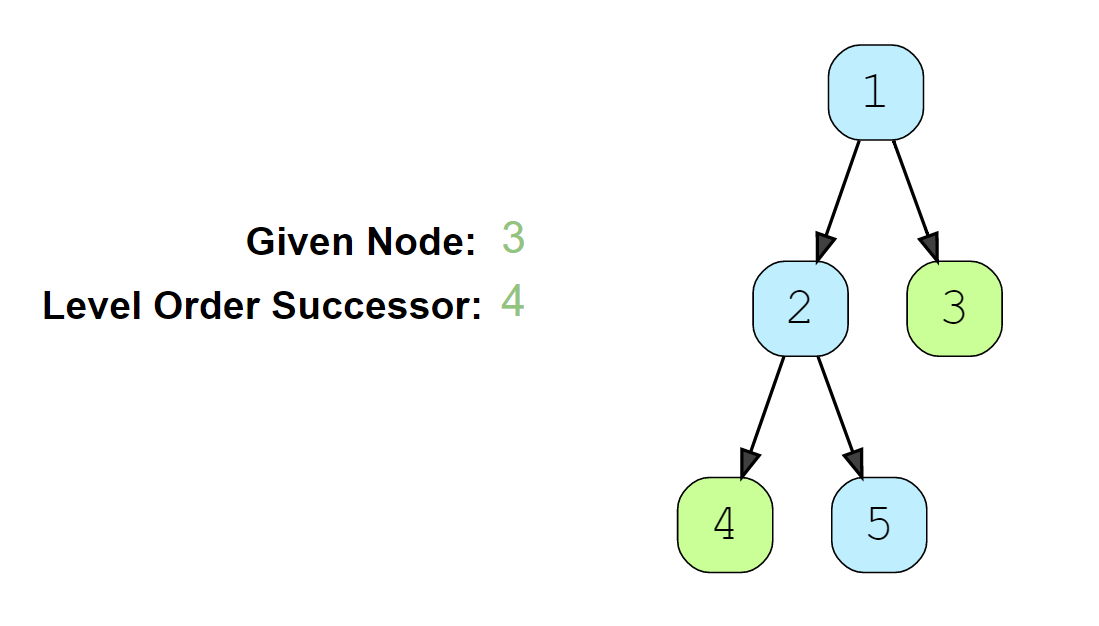

In [ ]:
def find_successor(root, key):
    if root is None:
        return None

    queue = deque()
    queue.append(root)
    while queue:
        currentNode = queue.popleft()
        # insert the children of current node in the queue
        if currentNode.left:
            queue.append(currentNode.left)
        if currentNode.right:
            queue.append(currentNode.right)

        # break if we have found the key
        if currentNode.val == key:
            break

    return queue[0] if queue else None

### Symmetric Tree

Two trees are a mirror reflection of each other if:

1. Their two roots have the same value.
2. The right subtree of each tree is a mirror reflection of the left subtree of the other tree.

In [ ]:
class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:

        def isMirror(root1, root2):

            if not root1 and not root2:
                return True
            # if any node is not None then not symmetric
            if not root1 or not root2:
                return False

            return (root1.val == root2.val) and isMirror(root1.left, root2.right) and isMirror(root1.right, root2.left)

        return isMirror(root, root)

### [Invert tree](https://leetcode.com/problems/invert-binary-tree/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        
        # base condition to break recursion
        if root is None:
            return 
        
        # swap
        root.left, root.right = root.right, root.left
        
        self.invertTree(root.left)
        self.invertTree(root.right)
        
        return root

### [Closest binary tree value](https://leetcode.com/problems/closest-binary-search-tree-value/)

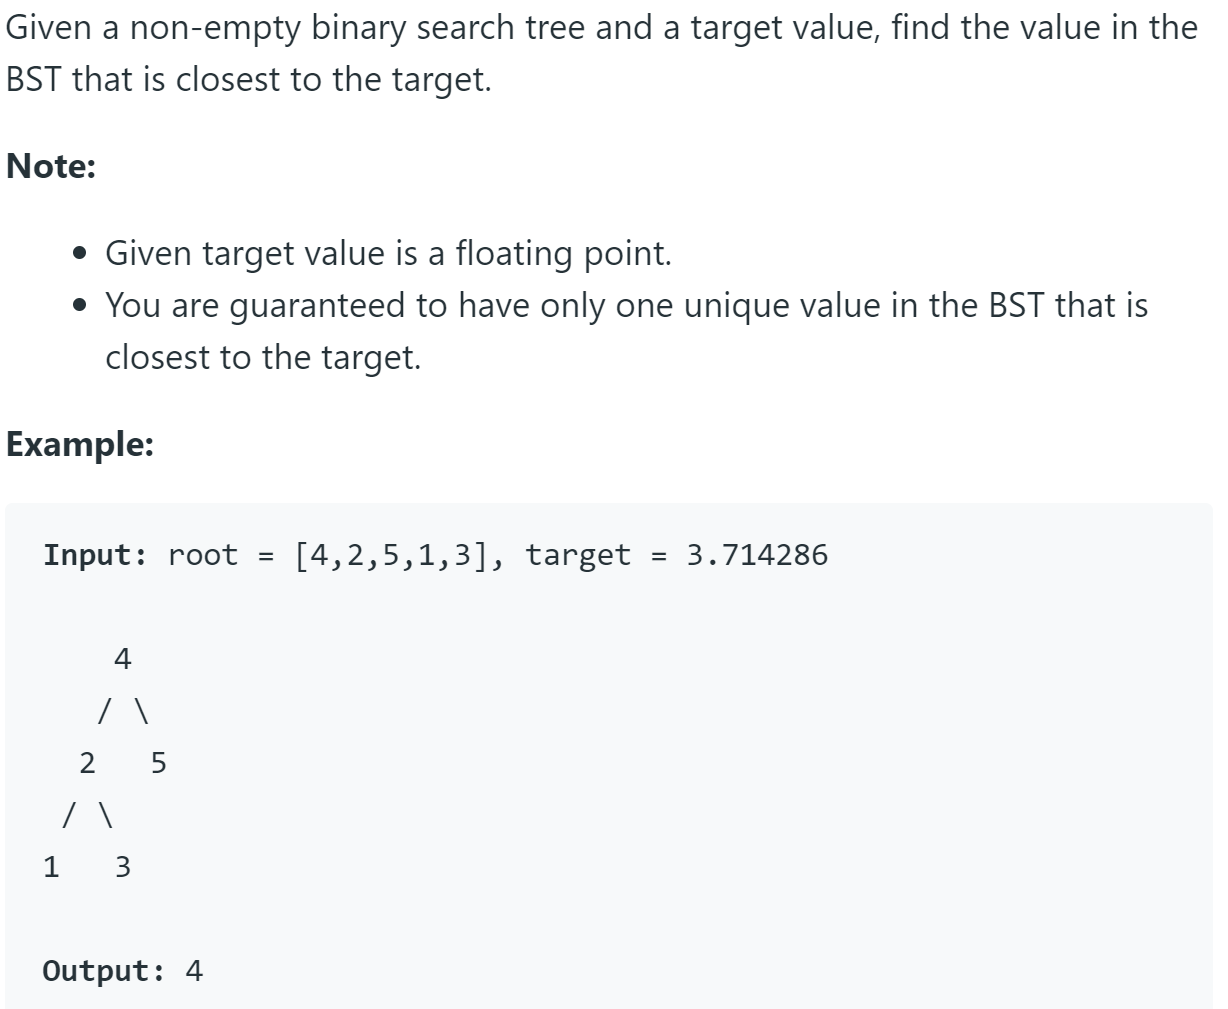

In [ ]:
class Solution:
    def closestValue(self, root: TreeNode, target: float) -> int:
        def dfs(root):
            nonlocal smallest_diff, closest
            # preorder traversal
            if not root:
                return

            if abs(root.val - target) < smallest_diff:
                smallest_diff = abs(root.val - target)
                closest = root.val

            dfs(root.left)
            dfs(root.right)

        smallest_diff = float('inf')
        closest = 0
        dfs(root)
        return closest

### [Merge two binary trees](https://leetcode.com/problems/merge-two-binary-trees/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def mergeTrees(self, t1: TreeNode, t2: TreeNode) -> TreeNode:
        
        
        if t1 is None:
            return t2
        if t2 is None:
            return t1
        
        t1.val += t2.val
        t1.left = self.mergeTrees(t1.left, t2.left)
        t1.right = self.mergeTrees(t1.right, t2.right)
        return t1
        

### [Range Sum of BST](https://leetcode.com/problems/range-sum-of-bst/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution(object):
    def rangeSumBST(self, root, L, R):
        def dfs(node):
            if node:
                if L <= node.val <= R:
                    self.ans += node.val
                if L < node.val:
                    dfs(node.left)
                if node.val < R:
                    dfs(node.right)

        self.ans = 0
        dfs(root)
        return self.ans

## Medium problems

### [ Count univalue subtrees](https://leetcode.com/problems/count-univalue-subtrees/)

In [ ]:
class Solution:
    def countUnivalSubtrees(self, root: TreeNode) -> int:

### Lowest common ancestor of BT

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        print(root.val) if root else print(0)
        if root is None:
            return None

        if root == p or root == q:
            return root

        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)

        # if both left and right are p and q. return their parent as an ancestor
        if left and right:
            return root
        # if both left and right are not p and q
        elif left is None and right is None:
            return None
        
        # if only one leaf equals p or q propagate the the leaf above      
        if left and right is None:
            return left
        elif right and left is None:
            return right

### Distance between two nodes in a Binary Tree

In [11]:
'''
Idea: Find the LCA of the two nodes and find the distance between node a to LCA and LCA to node b
'''


class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
def LCA(root, a, b):
    if not root:
        return None
    
    if root.val == a or root.val == b:
        return root 
    
    left = LCA(root.left, a, b)
    right = LCA(root.right, a, b)
    
    if left and right:
        return root
    elif not left and not right:
        return None 
    
    if left and not right:
        return left 
    elif right and not left:
        return right
    
def find_level(node, data, dist, level):
    if not node:
        return
    if node.val == data:
        dist.append(level)
        return
    find_level(node.left, data, dist, level+1)
    find_level(node.right, data, dist, level+1)
    
def distance(node, a, b):
    
    lca = LCA(node, a, b)
    dist_1 = []
    dist_2 = []
    if lca:
        find_level(lca, a, dist_1, 0)
        find_level(lca, b,dist_2, 0)
        # only if both the nodes are in the tree dist_1 and dist_2 will not be empty
        return dist_1[0] + dist_2[0] if len(dist_1) and len(dist_2) else -1
    else:
        return -1
    
root = TreeNode(1) 
root.left = TreeNode(2) 
root.right = TreeNode(3) 
root.left.left = TreeNode(4) 
root.left.right = TreeNode(5) 
root.right.left = TreeNode(6) 
root.right.right = TreeNode(7) 
root.right.left.right = TreeNode(8)

print(distance(root, 4,50))
        
    

-1


### [Maximum width of Binary Tree](https://leetcode.com/problems/maximum-width-of-binary-tree/)

In [12]:
'''
Approach: Width is the difference between the right most node and left most node. 
At every level, we calculate the width and keep note of the maximum width. 
In a complete binary tree, left is at a position root*2 and right is at position root*2 + 1
Level order traversal. 
TC: O(N)
SC: O(N)
'''

class Solution:
    def widthOfBinaryTree(self, root: TreeNode):
        
        queue = collections.deque()
        queue.appendleft((root,0))
        width = 0
        
        while queue:
            level = []    
            size = len(queue)
            
            for _ in range(size):
                
                node, pos = queue.popleft()
                
                if node.left:
                    queue.append((node.left, pos*2))

                if node.right:
                    queue.append((node.right, pos*2+1))
                
                level.append([node.val,pos])
                
                # max of widths for every level. 
                width = max(width, level[-1][1] - level[0][1] + 1)
            
        return width

### [all-nodes-distance-k-in-binary-tree](https://leetcode.com/problems/all-nodes-distance-k-in-binary-tree)

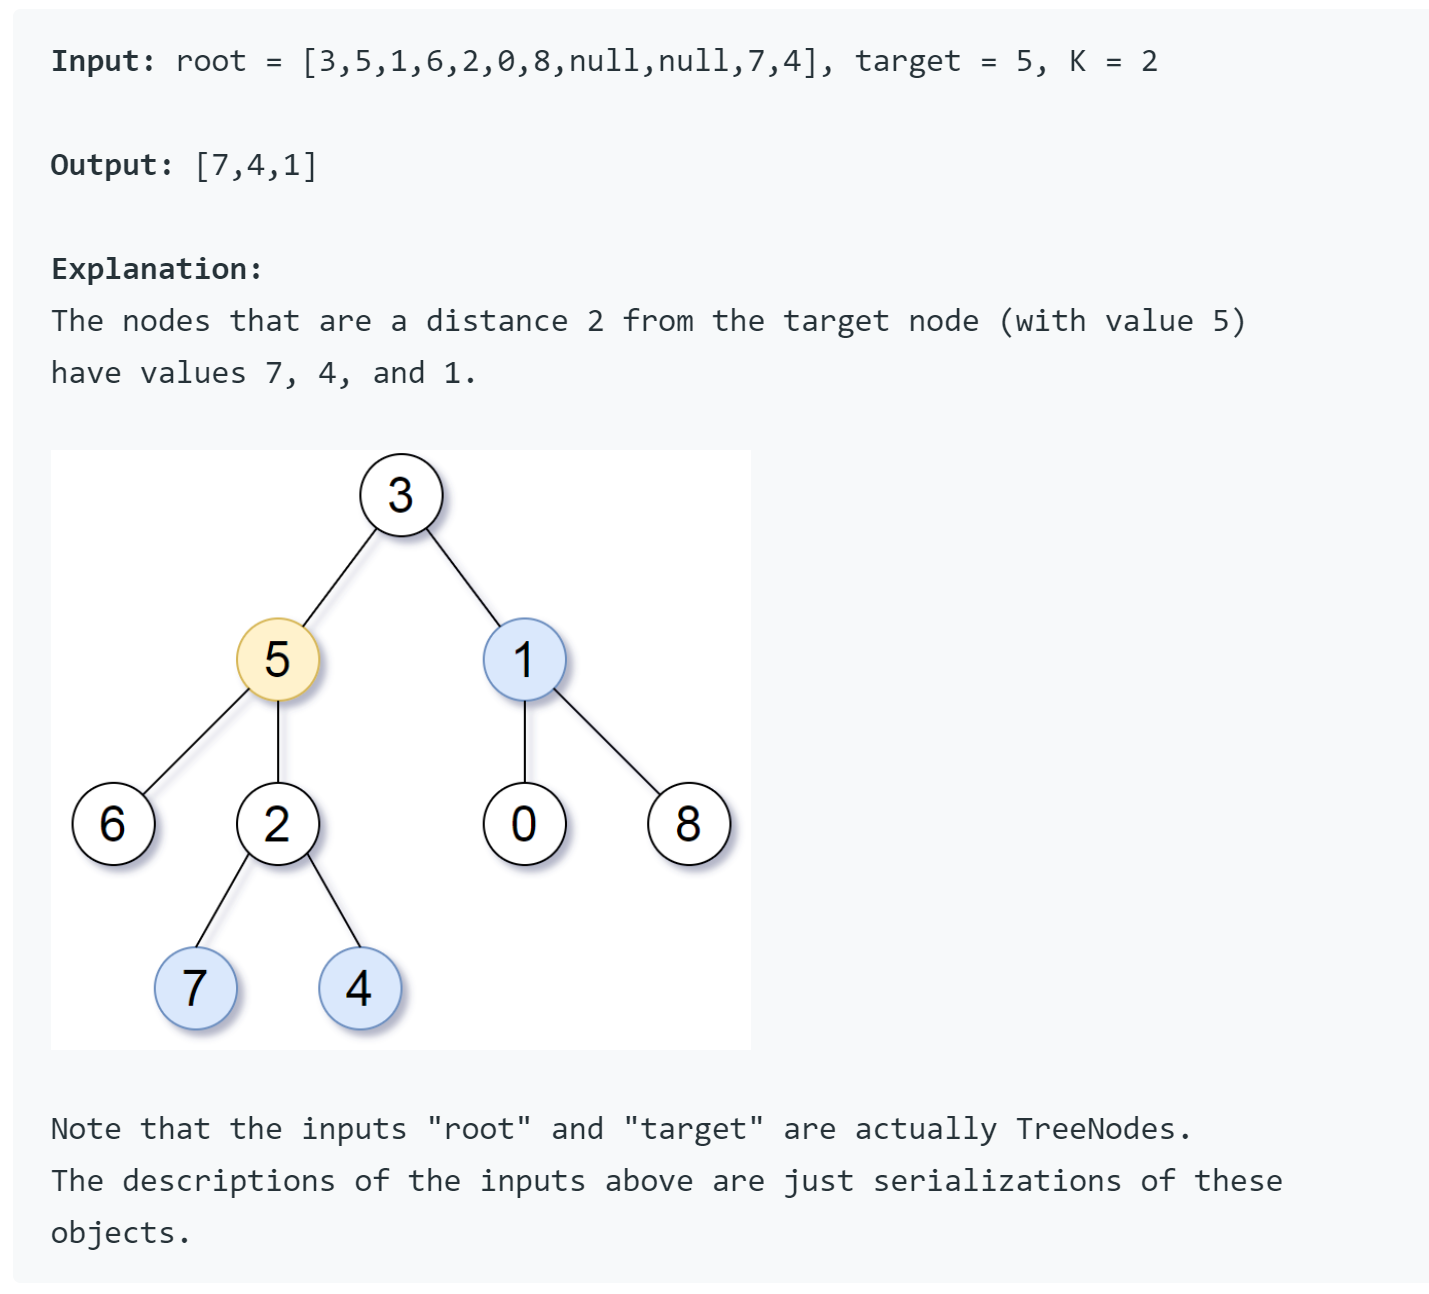

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
from collections import defaultdict
class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, K: int) -> List[int]:
        if not root:
            return []
        
        # create a graph 
        def create_graph(root):
            if not root:
                return 
            if root.left:
                graph[root.val].append(root.left.val)
                graph[root.left.val].append(root.val)
            if root.right:
                graph[root.val].append(root.right.val)
                graph[root.right.val].append(root.val)
                
            create_graph(root.left)
            create_graph(root.right)
            
        graph = defaultdict(list)
        create_graph(root)
        
        # check for nodes k distance from target by doing DFS
        def dfs_graph(node, dist):
            visited.add(node)
            if dist == 0:
                res.append(node)
                return
            for nei in graph[node]:
                if nei not in visited:
                    dfs_graph(nei, dist-1)
        
        visited = set()
        res = []
        dfs_graph(target.val,K)
        return res
        

### Next right pointer

### [inorder-successor-in-bst](https://leetcode.com/problems/inorder-successor-in-bst/)

### [inorder-successor-in-bst-ii](https://leetcode.com/problems/inorder-successor-in-bst-ii/)

### [binary-tree-tilt](https://leetcode.com/problems/binary-tree-tilt/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def findTilt(self, root: TreeNode) -> int:
        
        def dfs(root):
            if not root:
                return 0

            left = dfs(root.left)
            right = dfs(root.right)
            # each small subtree (root, left, right)
            self.tilt += abs(left - right)
            return left + right + root.val
            
                
        self.tilt = 0 
        dfs(root)
        return self.tilt

### [second-minimum-node-in-a-binary-tree](https://leetcode.com/problems/second-minimum-node-in-a-binary-tree/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def findTilt(self, root: TreeNode) -> int:
        
        def dfs(root):
            if not root:
                return 0

            left = dfs(root.left)
            right = dfs(root.right)
            self.tilt += abs(left - right)
            return left + right + root.val
            
                
        self.tilt = 0 
        dfs(root)
        return self.tilt

https://leetcode.com/problems/longest-univalue-path/

https://leetcode.com/problems/zigzag-conversion/

https://leetcode.com/problems/minimum-cost-tree-from-leaf-values/

https://leetcode.com/problems/maximum-binary-tree/

https://leetcode.com/problems/count-complete-tree-nodes/

https://leetcode.com/problems/print-binary-tree/

https://leetcode.com/problems/count-univalue-subtrees/

https://leetcode.com/problems/find-duplicate-subtrees/

https://leetcode.com/problems/delete-node-in-a-bst/

https://leetcode.com/problems/encode-n-ary-tree-to-binary-tree/

https://leetcode.com/problems/balance-a-binary-search-tree/

https://leetcode.com/problems/unique-binary-search-trees/

### [BST iterator](https://leetcode.com/problems/binary-search-tree-iterator/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


'''
as next returns the min value in the tree. inorder traversal of the BST will give us a sorted array. 
but storing all the nodes of the tree would give O(N) space complexity. We have to get O(h) meaning
we have to traverse a subtree only.  

'''
class BSTIterator:

    def __init__(self, root: TreeNode):
        
        self.stack = []
        self.left_inorder(root)
        print(self.stack)
        
    def left_inorder(self, root):
        while root:
            self.stack.append(root)
            root = root.left 
        
    def next(self) -> int:
        """
        @return the next smallest number
        """
        left_most_node = self.stack.pop()
        if left_most_node.right:
            self.left_inorder(left_most_node.right)
        return left_most_node.val
        

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        return len(self.stack) > 0
        


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()

https://leetcode.com/problems/convert-sorted-list-to-binary-search-tree/

https://leetcode.com/problems/unique-binary-search-trees-ii/

https://leetcode.com/problems/unique-binary-search-trees/

### [Boundary-of-binary-tree](https://leetcode.com/problems/boundary-of-binary-tree/)

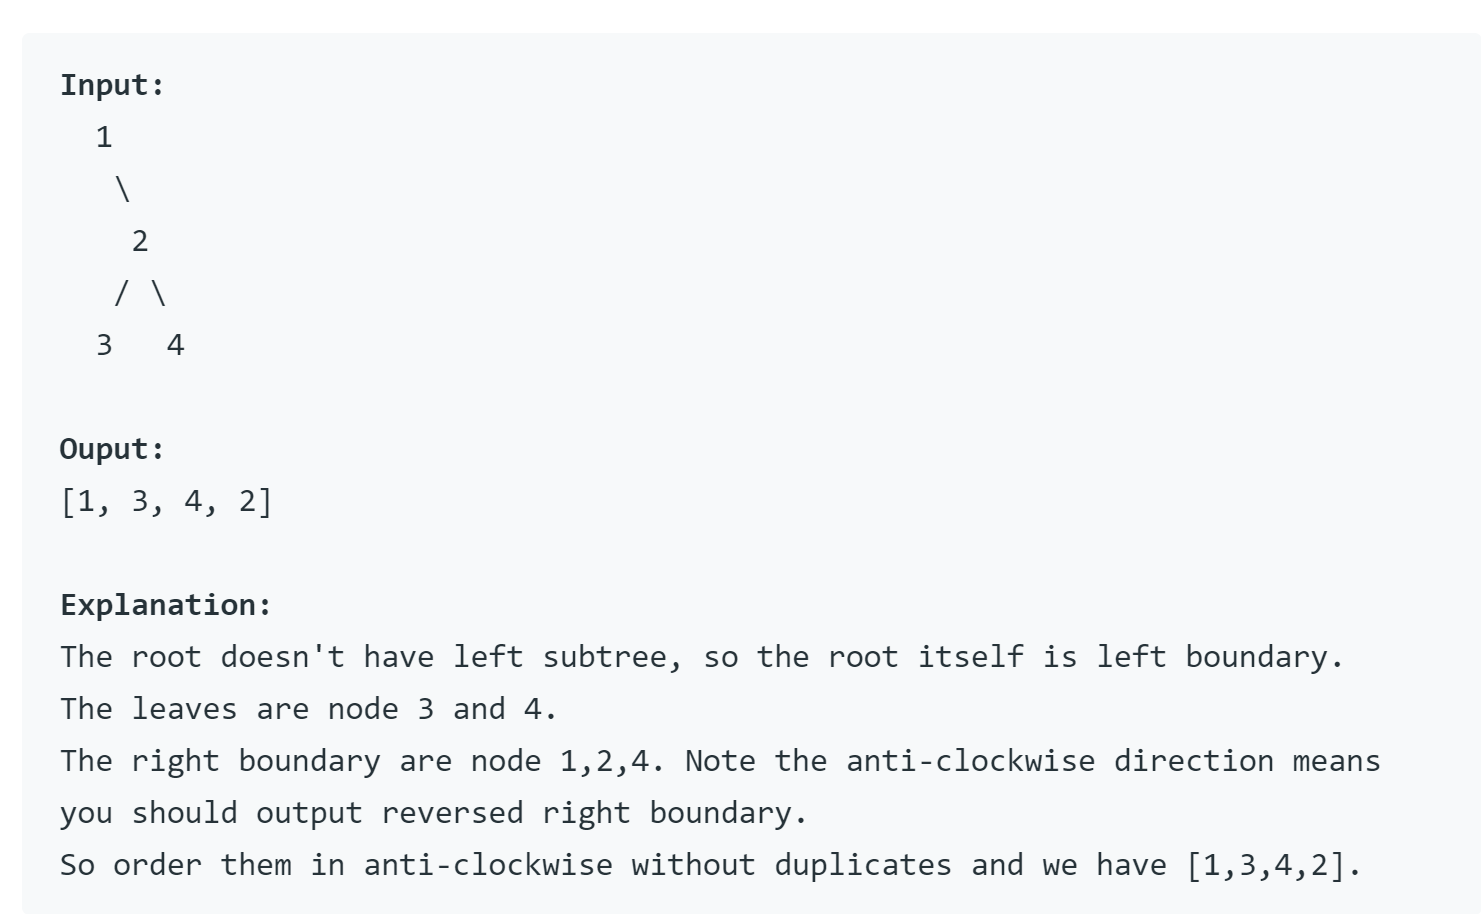

## BST problems

### [Balance a Binary Search Tree](https://leetcode.com/problems/balance-a-binary-search-tree/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def balanceBST(self, root: TreeNode) -> TreeNode:
        sorted_list = []
        def inorder(root):
            if not root:
                return None
            inorder(root.left)
            sorted_list.append(root.val)
            inorder(root.right)
            
        def construct_tree(list, low, high):
            if low > high:
                return None
            mid = low + (high - low) // 2
            root = TreeNode(sorted_list[mid])
            root.left = construct_tree(sorted_list, low, mid - 1)
            root.right = construct_tree(sorted_list, mid+1, high)
            return root
        
        inorder(root)
        low, high = 0, len(sorted_list)-1
        return construct_tree(sorted_list, low, high)
        

### [Validate Binary search tree](https://leetcode.com/problems/validate-binary-search-tree/)


In [ ]:
'''
Time complexity: O(N)
Space complexity: O(N)
'''


class Solution:
    def isValidBST(self, root: TreeNode) -> bool:

        def helper(node, lower=float('-inf'), upper=float('inf')):
            if not node:
                return True

            val = node.val
            # main condition
            if val <= lower or val >= upper:
                return False

            # left node should be greater than - inf and less than its root
            if not helper(node.left, lower, val):
                return False

            # left node should be greater than its root and less than inf
            if not helper(node.right, val, upper):
                return False

            return True

        return helper(root)

### [Lowest common ancestor in a BST](https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-search-tree)

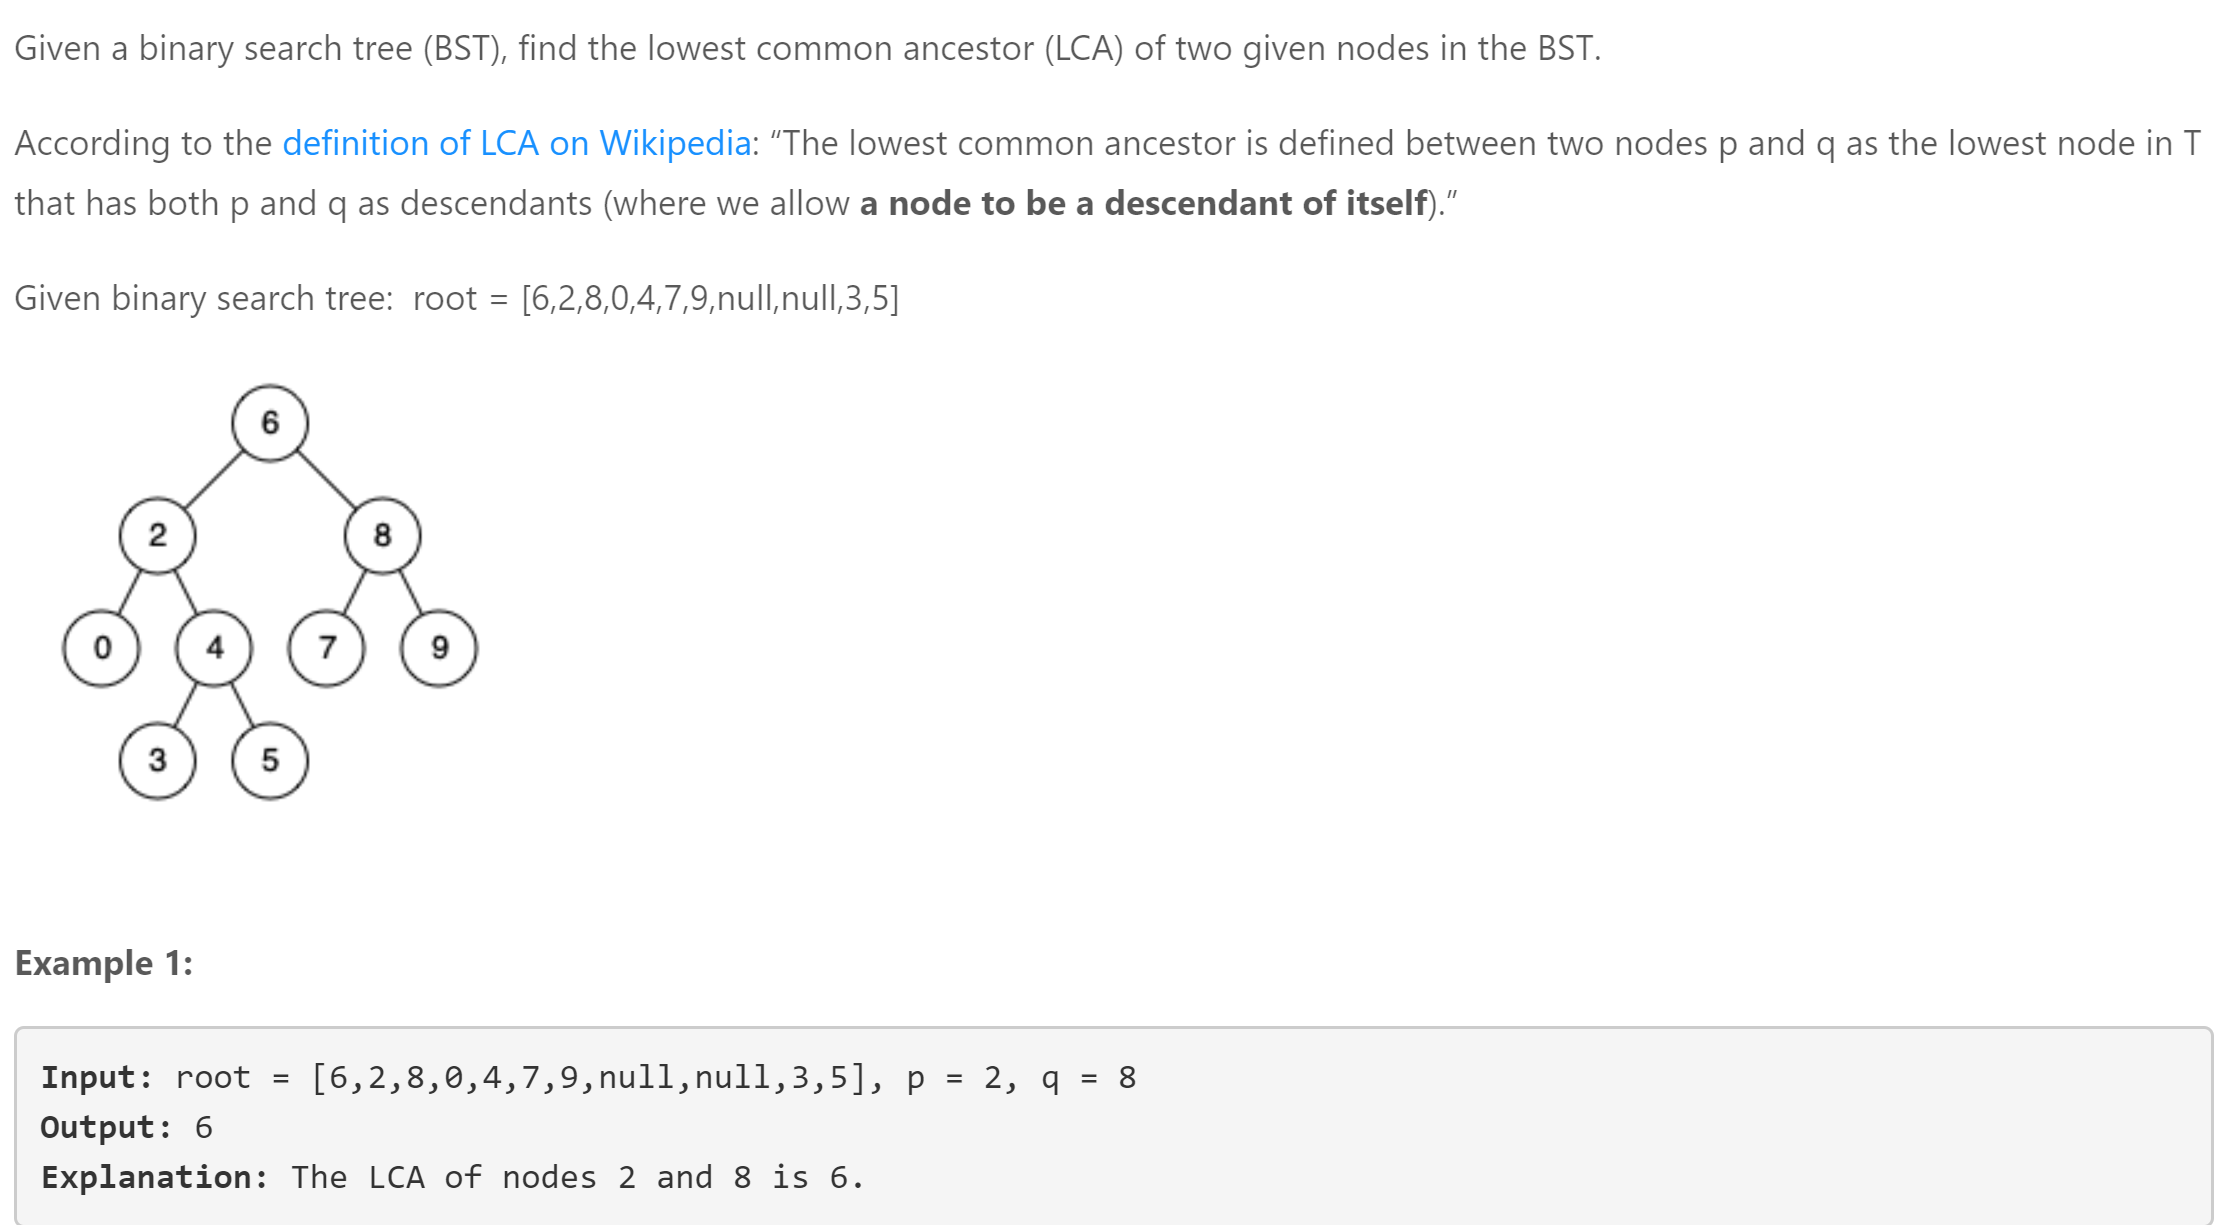

**Algorithm:**   
Time complexity: O(N)  
Space complexity: O(N)  
1. Start traversing the tree from the root node.
2. If both the nodes p and q are in the right subtree, then continue the search with right subtree starting step 1.
3. If both the nodes p and q are in the left subtree, then continue the search with left subtree starting step 1.
4. If both step 2 and step 3 are not true, this means we have found the node which is common to node p's and q's subtrees. and hence we return this common node as the LCA

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if p.val > root.val and q.val > root.val:
            return self.lowestCommonAncestor(root.right, p, q)
        elif p.val < root.val and q.val < root.val:
            return self.lowestCommonAncestor(root.left, p, q)
        else:
            return root

### BFS problems

### [Find largest value in each tree row](https://leetcode.com/problems/find-largest-value-in-each-tree-row/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def largestValues(self, root: TreeNode) -> List[int]:
        
        # base case
        if not root:
            return
        # level order traversal
        res = []
        def bfs(root, level):
            queue = []
            queue.insert(0,root)
            # levels = []
            
            while queue:
                if level == len(res):
                    res.append([])
                    
                root = queue.pop()
                res[level].append(root.val)
                
                if root.left:
                    bfs(root.left, level + 1) 
                if root.right:
                    bfs(root.right, level + 1) 
        bfs(root,0)
        # print(res)
        return [max(x) for x in res]

        

### Reverse level order traversal

In [ ]:
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:

        result = collections.deque()
        if not root:
            return

        queue = deque()
        queue.append(root)

        while queue:
            level_size = len(queue)
            levels = []
            for _ in range(level_size):

                curr_node = queue.popleft()
                levels.append(curr_node.val)

                if curr_node.left:
                    queue.append(curr_node.left)
                if curr_node.right:
                    queue.append(curr_node.right)
            # every level is added to the left
            result.appendleft(levels)

        return result

### Average levels of BT
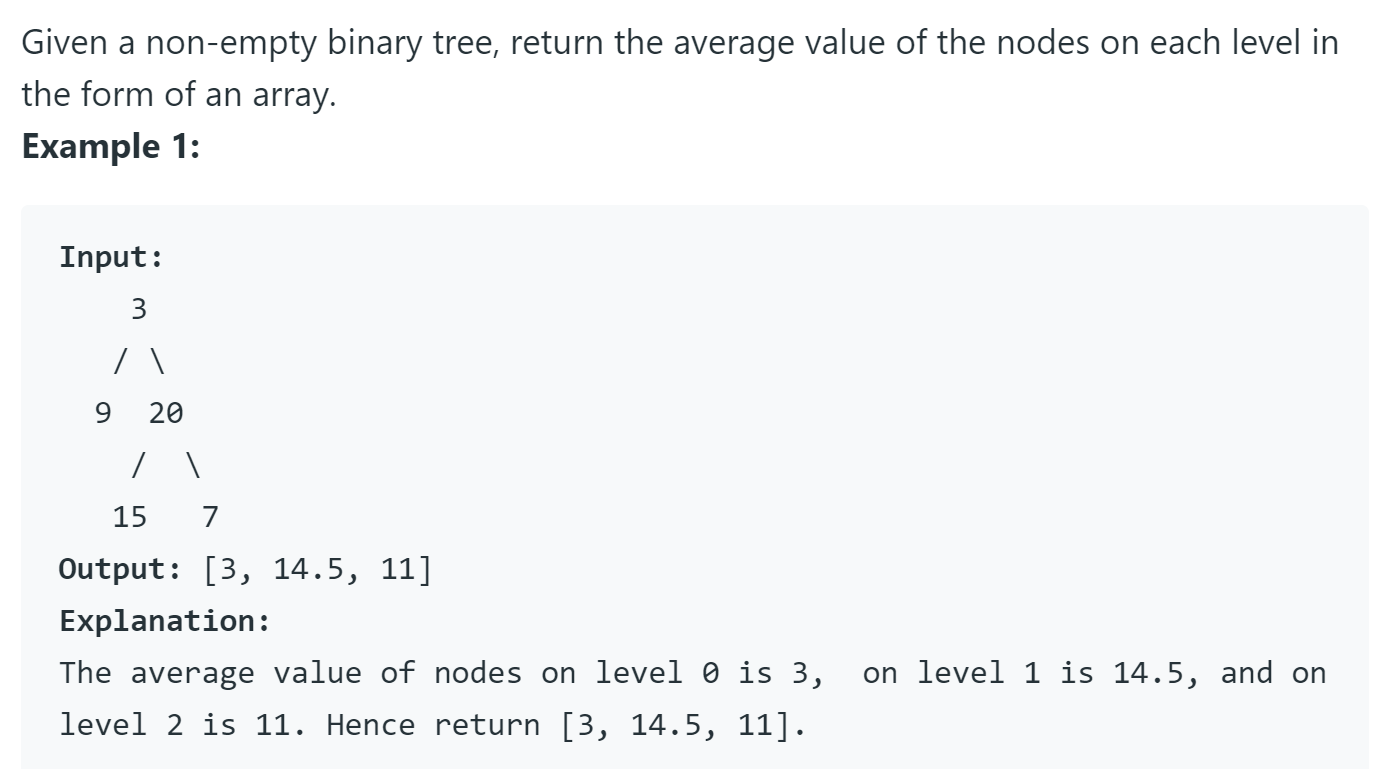

In [ ]:
from collections import deque


class Solution:
    def averageOfLevels(self, root: TreeNode) -> List[float]:
        # bfs
        queue = deque()
        res = []
        queue.appendleft(root)

        while queue:
            levelSize = len(queue)

            level_sum = 0
            for _ in range(levelSize):
                node = queue.popleft()
                level_sum += node.val

                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            res.append(level_sum / len(levelSize))

        return res

### [Right side view](https://leetcode.com/problems/binary-tree-right-side-view/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def rightSideView(self, root: TreeNode) -> List[int]:
        # levels = []
        res = []
        ans = []
        if not root:
            return 
        
        def helper(root, level):
            
            if len(res) == level:
                res.append([])
            
            res[level].append(root.val)
            # ans.append(res[level][-1])
            # print(ans)
            if root.left:
                helper(root.left, level + 1)
            if root.right:
                helper(root.right, level + 1)
            
        helper(root,0)
        for i in range(len(res)):
            ans.append(res[i][-1])
        return ans
            
            
        
        

### ZigZag traversal

In [3]:
class Solution:
    def zigzagLevelOrder(self, root):

        if not root:
            return
        # bfs
        queue = collections.deque()

        queue.appendleft(root)
        leftToRight = True
        result = []
        while queue:
            levelSize = len(queue)
            levels = []
            for _ in range(levelSize):
                node = queue.popleft()
                levels.append(node.val)

                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)

            if leftToRight:
                result.append(levels)
            else:
                result.append(levels[::-1])

            leftToRight = not leftToRight

        return result

### Vertical order traversal of BT

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


'''Edge cases:
1. If two nodes are on the same level and have same x coordinates, add smaller first. To overcome it I sorted the list
for example 5 and 6 are on the same level with same x coords, sorting will give [5,6] but there comes another edge case
2. If two nodes have same x coords but are on different levels of the tree. Sorting will not give us the correct order.
for example, 9 appears in level 2 and 7 appears in level 7. Then sorting will give [7,9] instead of [9,7]
'''


class Solution:
    def verticalTraversal(self, root: TreeNode) -> List[List[int]]:

        if not root:
            return
        # if a node's x co-ord matches then they are on the same vertical line

        # bfs

        graph = collections.defaultdict(list)

        queue = collections.deque()
        queue.appendleft((root, 0))
       
        while queue:
            
            for _ in range(len(queue)):
                node, pos = queue.popleft()
                graph[pos].append(node.val)

                if node.left:
                    queue.append((node.left, pos - 1))
                if node.right:
                    queue.append((node.right, pos + 1))

        res = [
            graph[x] for x in sorted(graph)
        ]

####  Inorder successor of BST

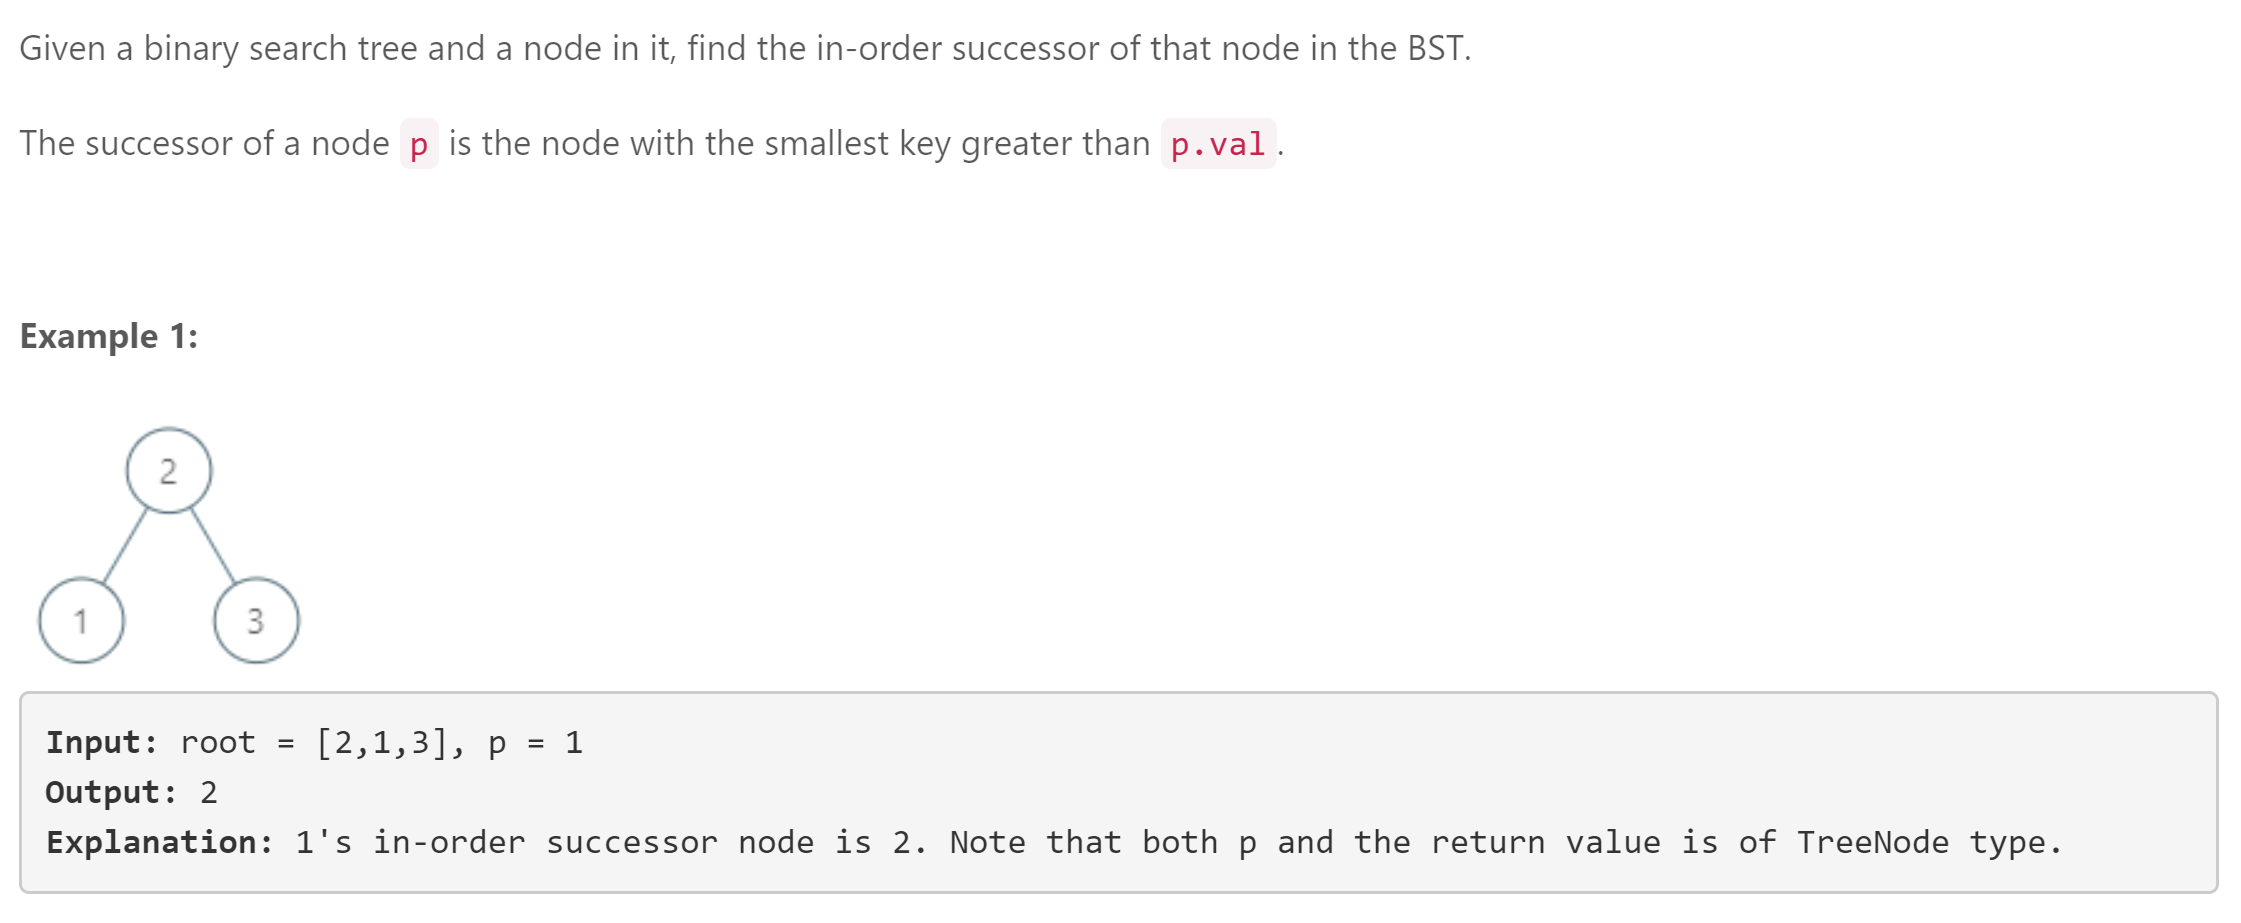

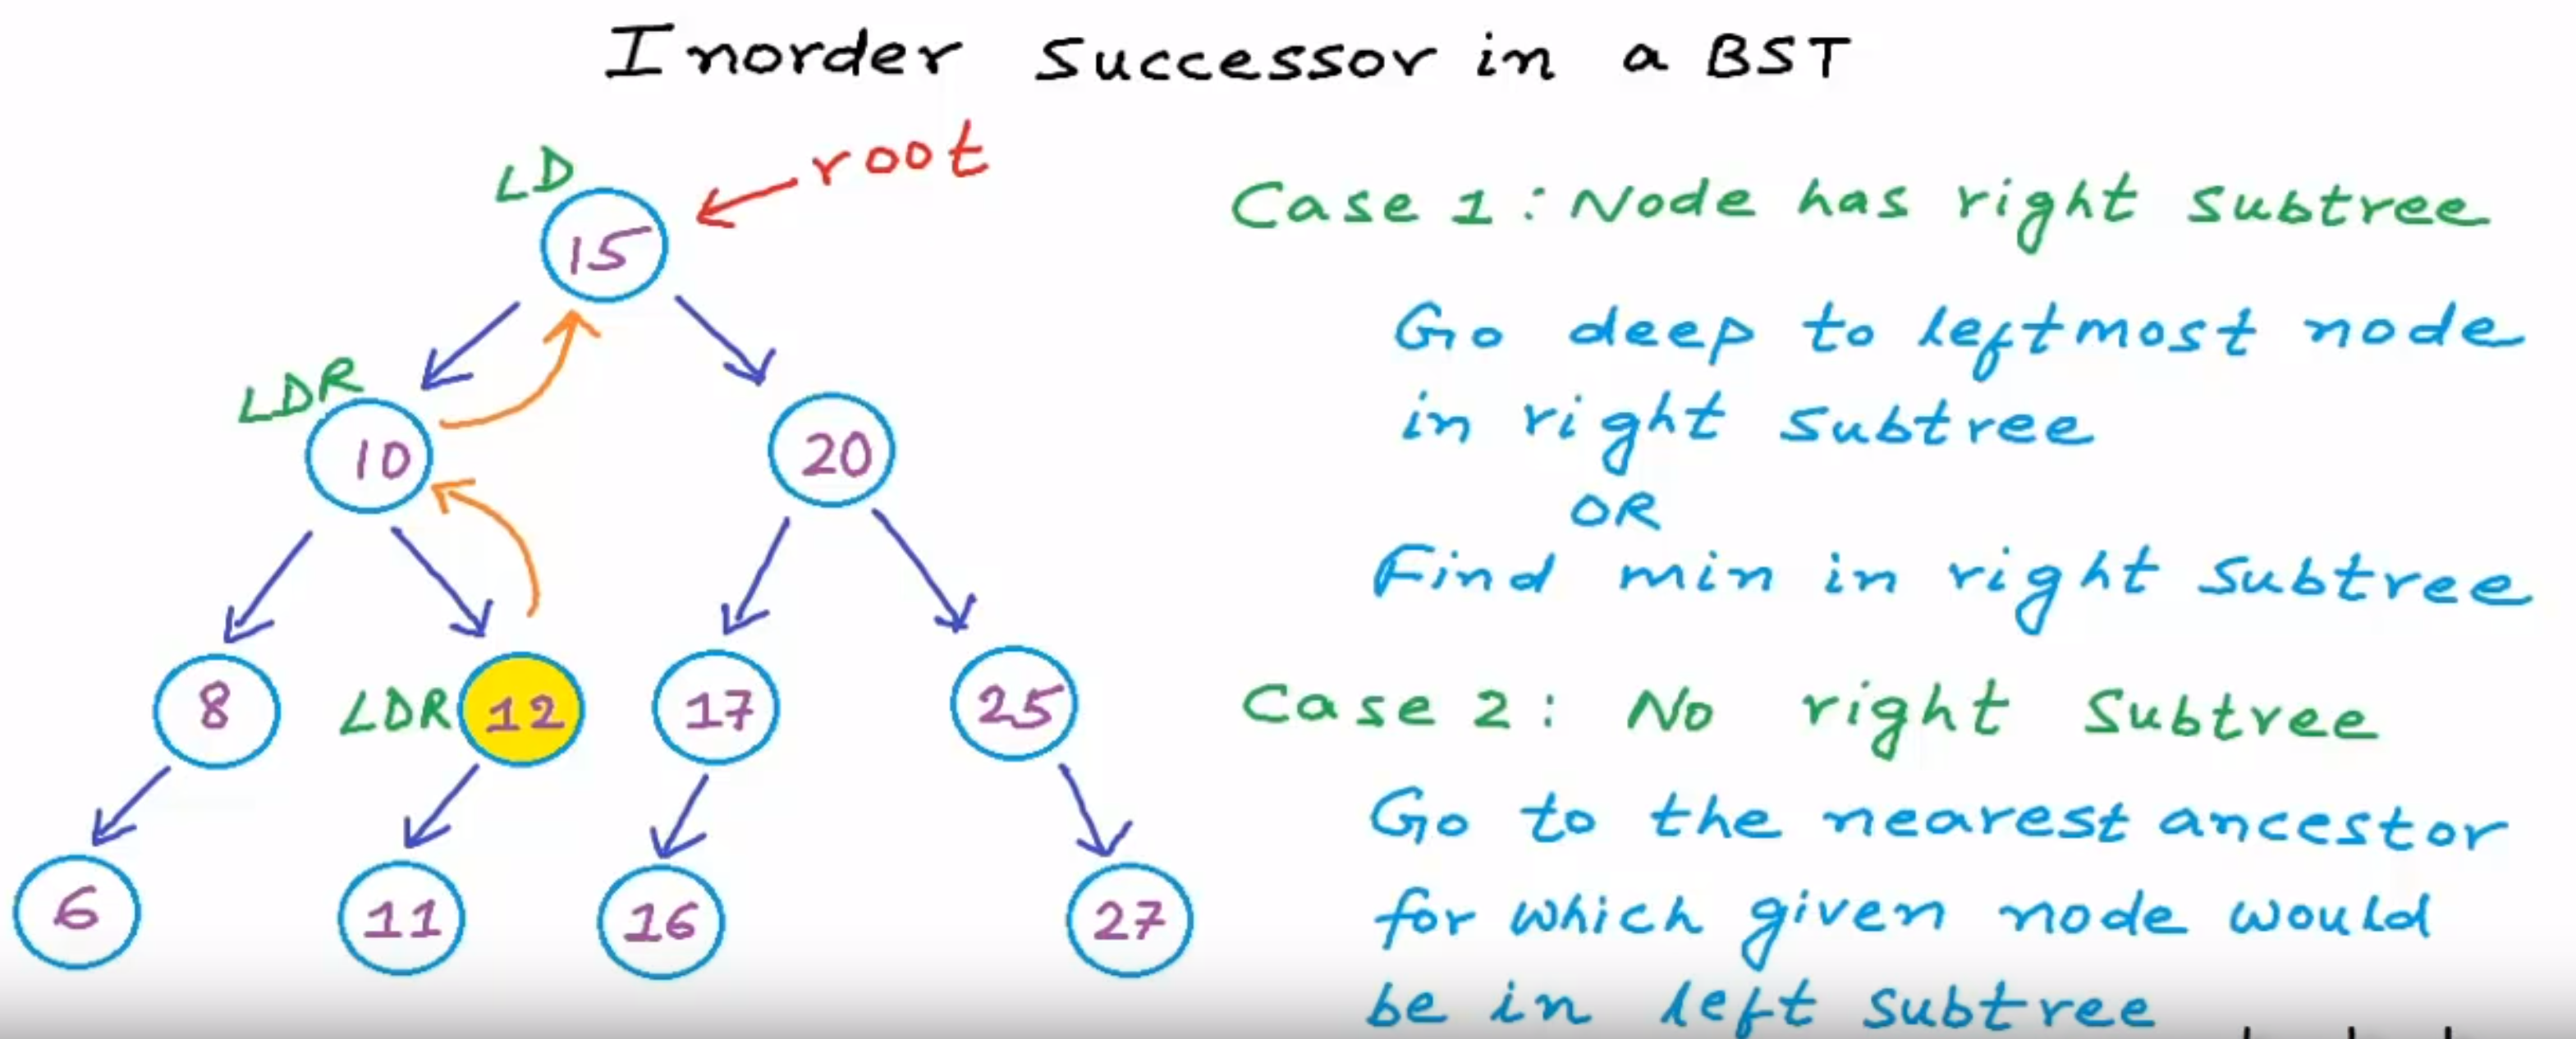

In [1]:
'''
successor is the smallest node after the current node in the BST
Easy way: Do an inorder traversal and get a sorted list. Find the value after the node p. **TC: O(N)** (Can do better?)
'''


class Solution:
    def inorderSuccessor(self, root: 'TreeNode', p: 'TreeNode') -> 'TreeNode':

SyntaxError: unexpected EOF while parsing (<ipython-input-1-75dcdee0f1d9>, line 8)

## Tree construction problems

#### 1. Construct Binary Tree from Preorder and Inorder Traversal


**Algorithm**

1. Inorder contains root of the tree at first index. Pop it and create a node
2. Slice the the preorder list into two parts  i.e left subtree list (inorder[:inorder.index(root)]) and right subtree list (inorder[inorder.index(root)+1:])
3. In each subtree to get the root, check inorder list


In [5]:
class Solution:
    def buildTree(self, preorder, inorder):
        if not preorder or not inorder:
            return None
        # get the root
        root_val = preorder.pop(0)  # O(N)
        # create a node
        root = TreeNode(root_val)

        inorderIndex = inorder.index(root_val)  # O(N)

        root.left = self.buildTree(preorder, inorder[:inorderIndex])  # O(N)
        root.right = self.buildTree(preorder, inorder[inorderIndex+1:])  # O(N)
        return root

### Construct Binary Tree from Preorder and Postorder Traversal¶

In [ ]:
class Solution:

    preIndex, posIndex = 0, 0

    def constructFromPrePost(self, pre, post):
        root = TreeNode(pre[self.preIndex])
        self.preIndex += 1
        if (root.val != post[self.posIndex]):
            root.left = self.constructFromPrePost(pre, post)
        if (root.val != post[self.posIndex]):
            root.right = self.constructFromPrePost(pre, post)
        self.posIndex += 1
        return root

### Construct Binary Tree from Ineorder and Postorder Traversal¶

**Solution 1:**  
TC: O(N^2)
SC: O(N)

In [ ]:
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:

        # postorder contains root at the end
        # postorder[-1] gives us the root of the tree.
        # inorder means left, root, right
        # after getting root from postorder, find the val in inorder,
        # the list left of inorder is left subtree and list right of inorder is right subtree.

        if not inorder or not postorder:
            return None

        val = postorder.pop()
        root = TreeNode(val)

        index = inorder.index(val)  # O(N)
        # why right subtree first?
        # inorder traversal goes 'Left-Parent-Right' and postorder traversal goes 'Left-Right-Parent'.
        # And, postorder.pop() keeps picking the right-most element of the list,
        # that means it should go 'Parent-(one of parents of) Right (subtree) - Left'
        # list slicing is O(N) as new list is created
        root.right = self.buildTree(inorder[index + 1:], postorder)  # O(N) (slicing of a list)
        root.left = self.buildTree(inorder[:index], postorder)  # O(N)

        return root

**Solution 2:**   
TC: O(N)  
SC: O(N)  

In [ ]:
class Solution:
    def buildTree(self, inorder, postorder):
        map_inorder = {}
        for i, val in enumerate(inorder):
            map_inorder[val] = i
        # as inorder means sorted array we can use binary search logic
        # this

        def helper(low, high):
            if low > high:
                return None
            node = TreeNode(postorder.pop())  # O(1)

            mid = map_inorder[node.val]  # O(1)
            node.right = helper(mid + 1, high)
            node.left = helper(low, mid - 1)
            return node

        return helper(0, len(inorder) - 1)

### Construct Binary Search Tree from Preorder Traversal

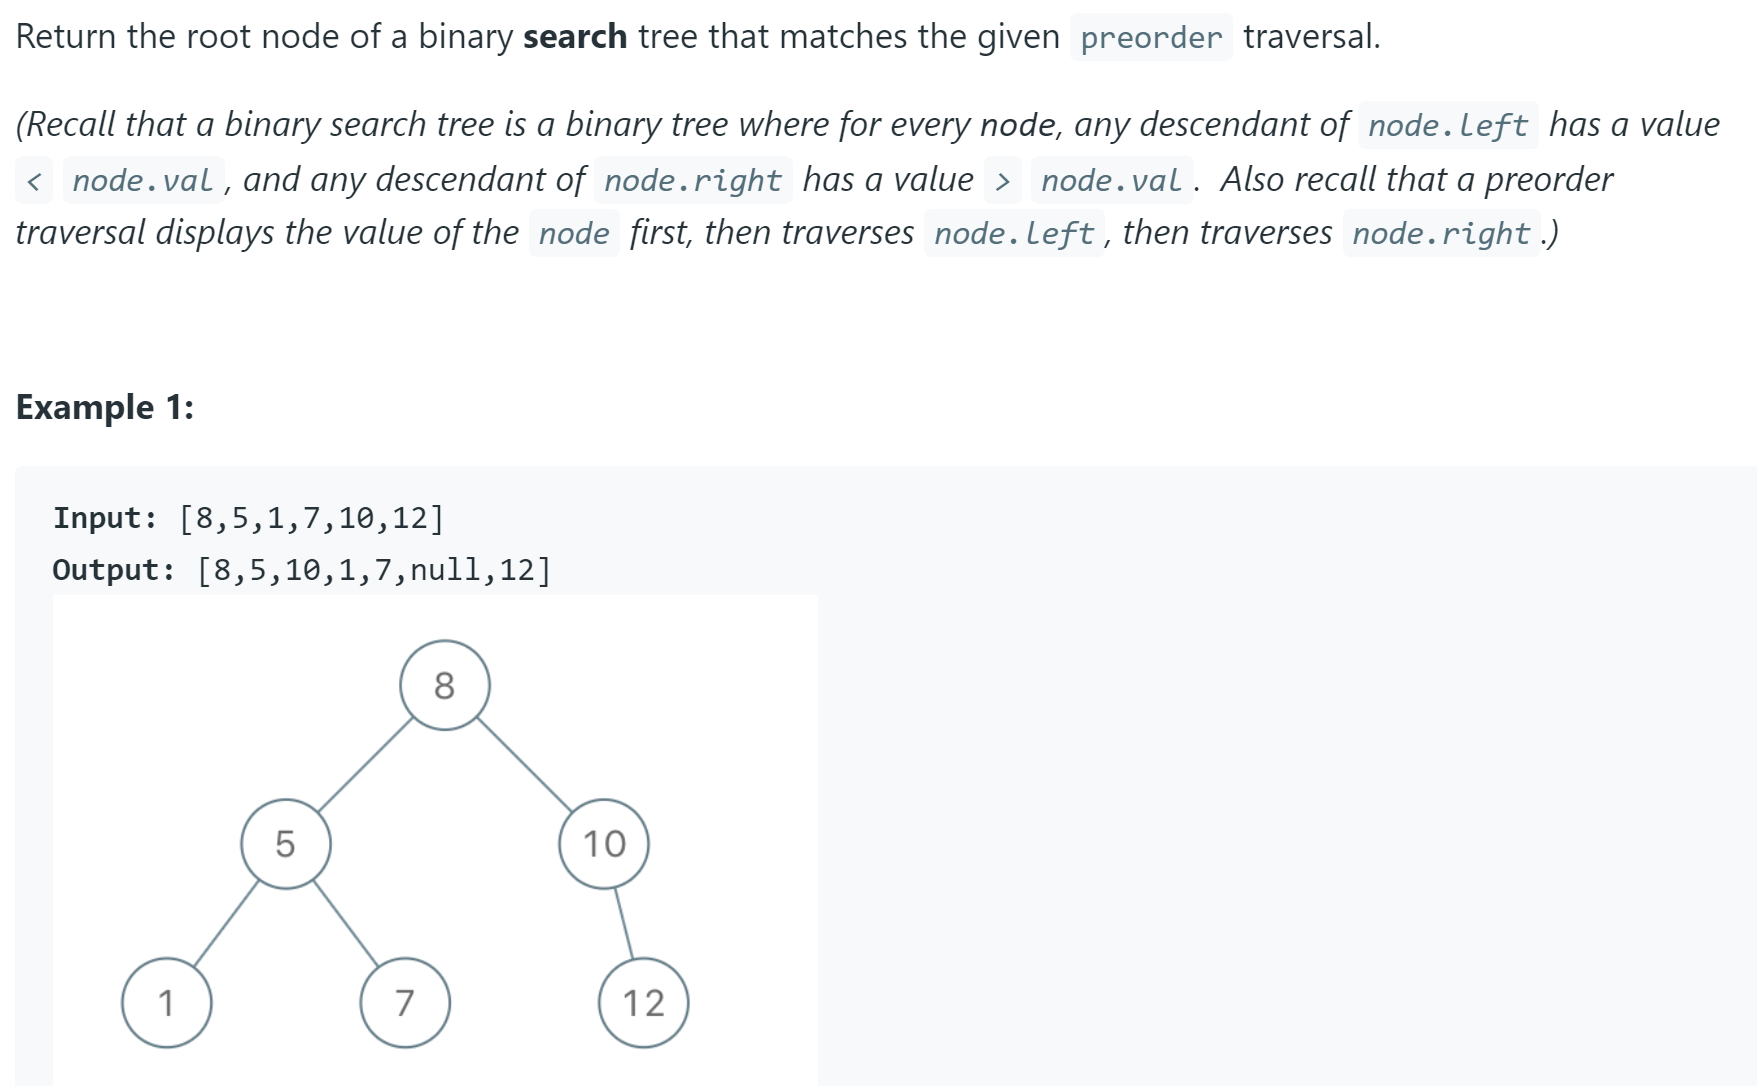

In [ ]:
class Solution:
    def bstFromPreorder(self, preorder: List[int]) -> TreeNode:
        # first val in a preorder is a root
        # have to perform insertion in a BST to construct a tree

        if not preorder:
            return None

        root = TreeNode(preorder[0])

        # same insertion into a BST
        def insertIntoBST(root, val):
            node = root
            while node:
                # insert into the right subtree
                if val > node.val:
                    # insert right now
                    if not node.right:
                        node.right = TreeNode(val)

                    else:
                        node = node.right
                # insert into the left subtree
                else:
                    # insert right now
                    if not node.left:
                        node.left = TreeNode(val)

                    else:
                        node = node.left

        for i in range(1, len(preorder)):
            insertIntoBST(root, preorder[i])
        return root

### Convert sorted array to BST

In [ ]:
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:
        def helper(low, high):
            if low > high:
                return None
            # mid of a sorted array is the root
            mid = (low + high) // 2

            root = TreeNode(nums[mid])

            root.left = helper(low, mid - 1)
            root.right = helper(mid + 1, high)
            return root

        return helper(0, len(nums) - 1)

#### Construct a BT from a string

#### Convert a sorted list to a BST

### Serialize Deserialize BT and  [Serialize Deserialize BST](https://leetcode.com/problems/serialize-and-deserialize-bst/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


class Codec:
    def serialize(self, root):
        """Encodes a tree to a single string.

        :type root: TreeNode
        :rtype: str
        """
        res = []

        def helper(root):
            # base case
            if not root:
                res.append(None)
                return
            else:
                res.append(root.val)

            # recursive call
            helper(root.left)
            helper(root.right)

        helper(root)
        return str(res)

    def deserialize(self, data):
        """Decodes your encoded data to tree.

        :type data: str
        :rtype: TreeNode
        """
        res = data.strip('][').split(', ')

        def rec(res):
            # base case 
            if res[0] == 'None':
                res.pop(0)
                return None

            node = TreeNode(res[0])
            res.pop(0)
            node.left = rec(res)
            node.right = rec(res)
            return node

        root = rec(res)
        return root


# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.deserialize(codec.serialize(root))

### Recover Binary Tree

## Path sum problems

### [Path sum](https://leetcode.com/problems/path-sum/)

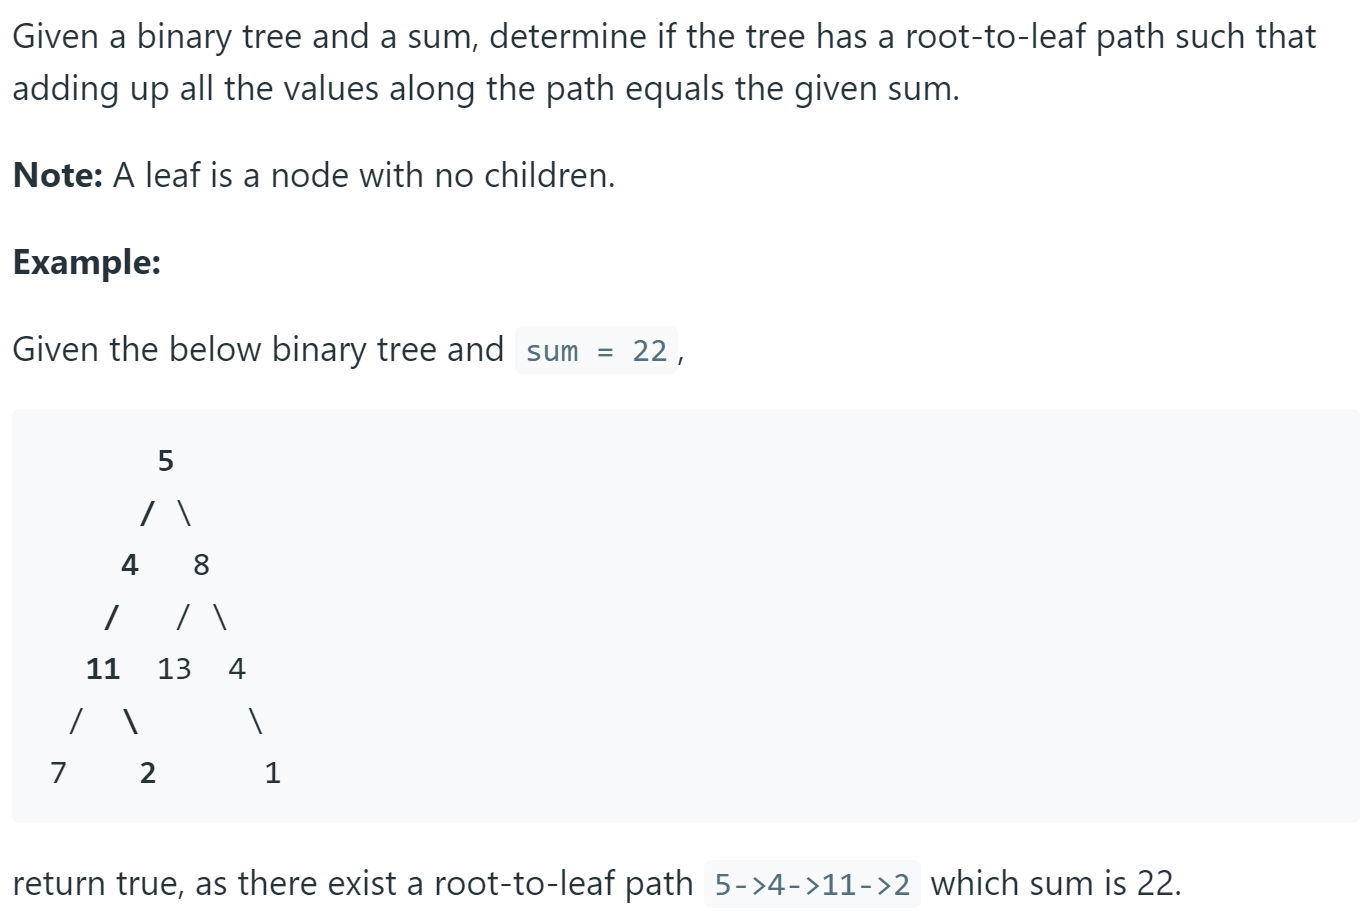

**Algorithm:**
1. Start DFS with the root of the tree.
2. If the current node is not a leaf node, do two things:
    Subtract the value of the current node from the given number to get a new sum => S = S - node.value
    Make two recursive calls for both the children of the current node with the new number calculated in the previous step.
3. At every step, see if the current node being visited is a leaf node and if its value is equal to the given number ‘S’. If both these conditions are true, we have found the required root-to-leaf path, therefore return true.
4. If the current node is a leaf but its value is not equal to the given number ‘S’, return false.

In [16]:
class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return

        if root.val == sum and root.left is None and root.right is None:
            return True

        return self.hasPathSum(root.left, sum - root.val) or self.hasPathSum(root.right, sum - root.val)

### Path sum 2 

Return the paths which equal a sum

In [2]:
class Solution:
    def pathSum(self, root, sum):
        def dfs(root, sum, path_nodes, all_paths):
            if not root:
                return
            # add node to path
            path_nodes.append(root.val)

            if root.val == sum and root.left is None and root.right is None:
                all_paths.append(list(path_nodes))
            else:
                dfs(root.left, sum - root.val, path_nodes, all_paths)
                dfs(root.right, sum - root.val, path_nodes, all_paths)
            # pop the node when its subtrees are traversed.
            path_nodes.pop()

        all_paths = []
        dfs(root, sum, [], all_paths)
        return all_paths

TC: O(N^2)
SC: O(N)

### [Path sum 3](https://leetcode.com/problems/path-sum-iii/)

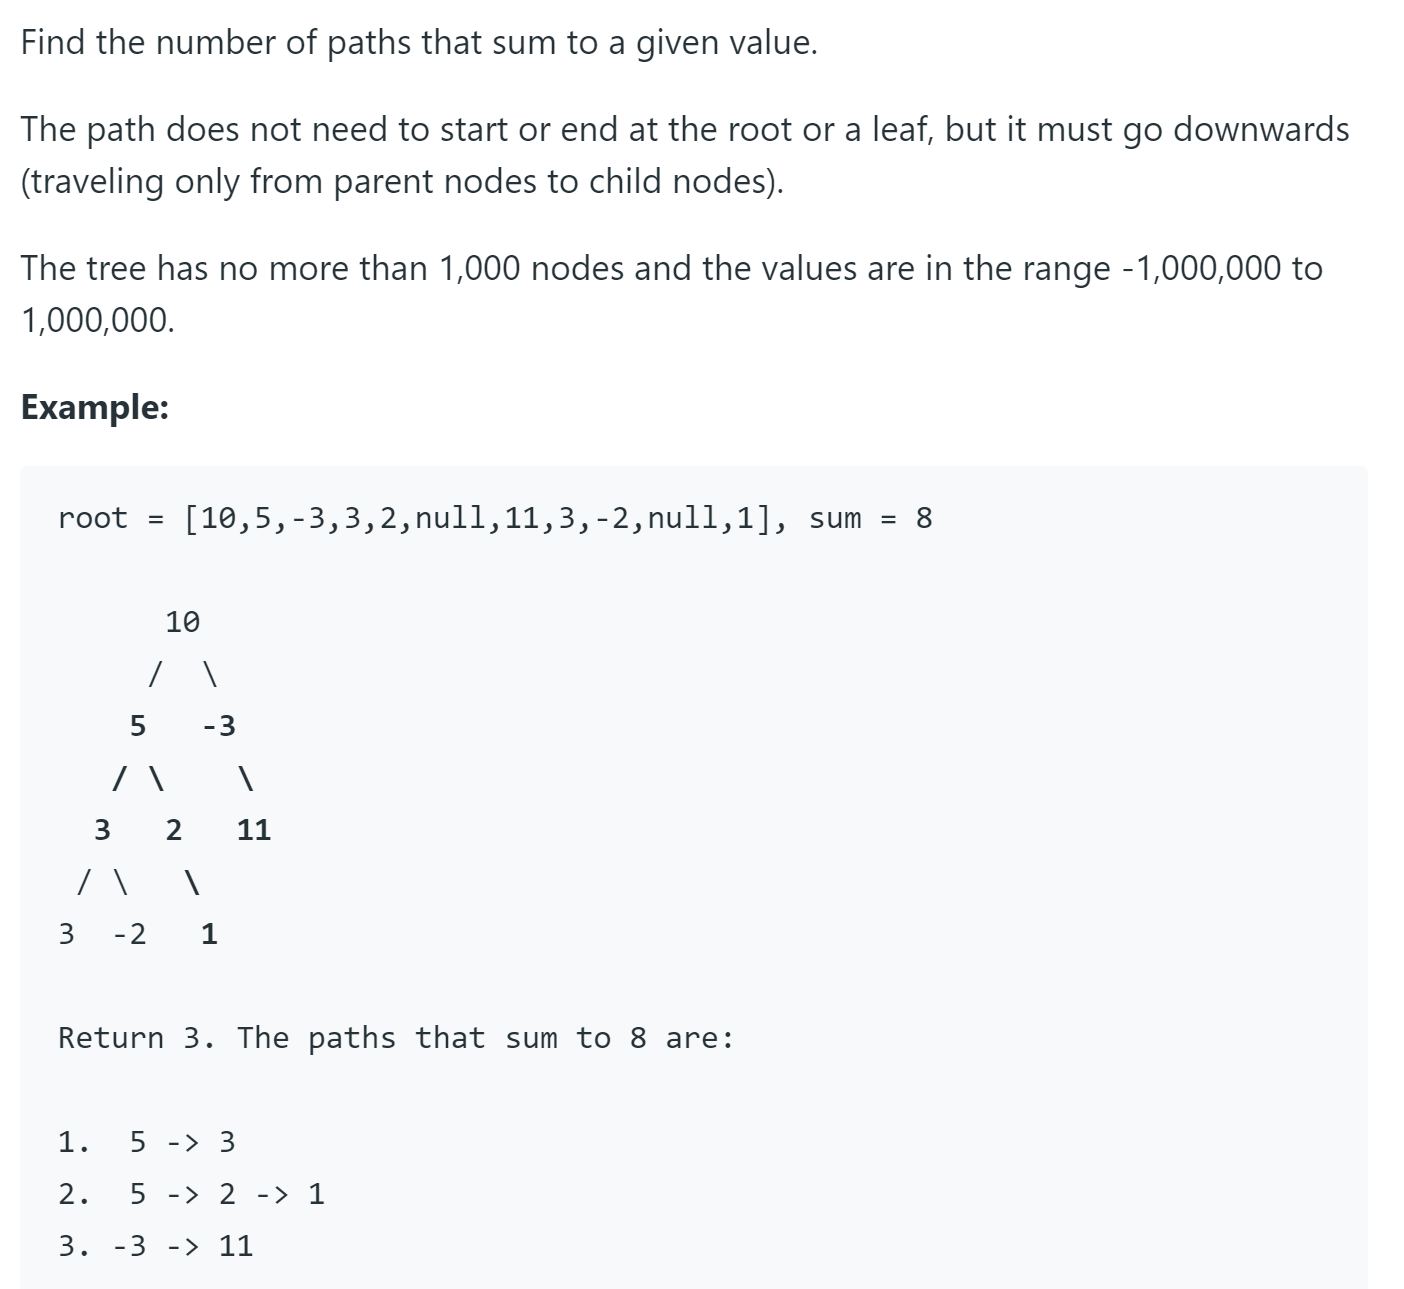

In [ ]:
class Solution:
    def pathSum(self, root: TreeNode, sum: int) -> int:
        

### [Path sum 4](https://leetcode.com/problems/path-sum-iv/)

True


### [Binary Tree Max path sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        
        def max_pathSum(root):
            if not root:
                return 0
            
            left_sum = max(max_pathSum(root.left),0)
            right_sum = max(max_pathSum(root.right),0)
            
            pathSum = root.val + left_sum + right_sum 
            self.max_sum = max(self.max_sum, pathSum)
            
            return root.val + max(left_sum ,right_sum)
        
        self.max_sum = float('-inf')
        max_pathSum(root)
        return self.max_sum
        

## Convert Tree problems


### 1. Flatten a Binary tree to a Linked List 

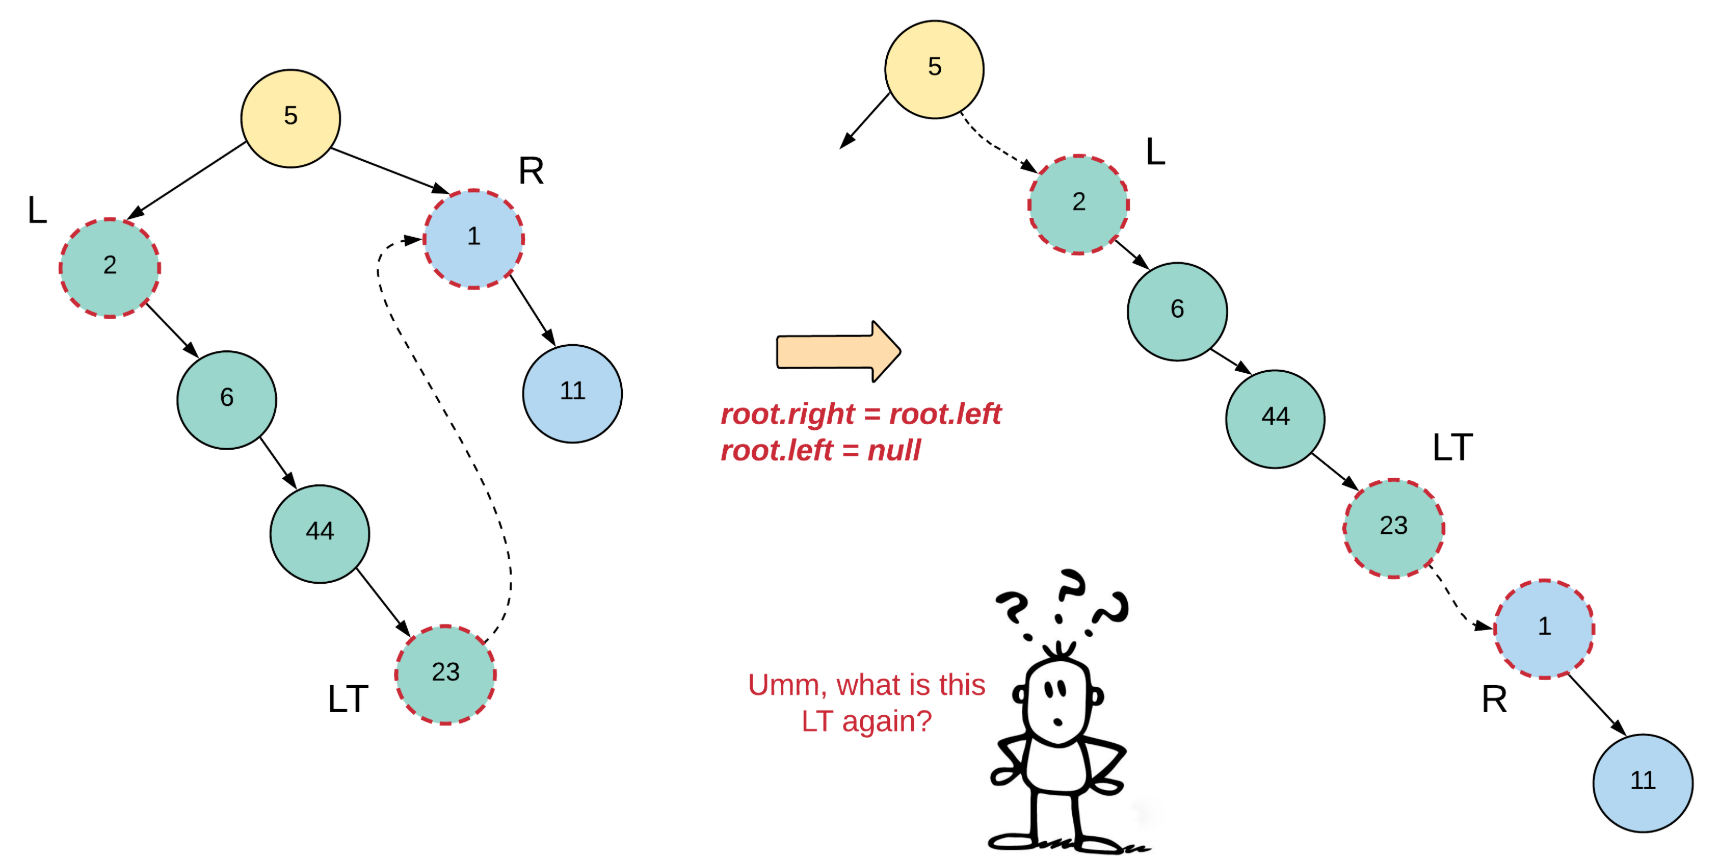

In [ ]:
class Solution:
    def flattenTree(self, node):

        # Handle the null scenario
        if not node:
            return None

        # For a leaf node, we simply return the
        # node as is.
        if not node.left and not node.right:
            return node

        # Recursively flatten the left subtree
        leftTail = self.flattenTree(node.left)

        # Recursively flatten the right subtree
        rightTail = self.flattenTree(node.right)

        # If there was a left subtree, we shuffle the connections
        # around so that there is nothing on the left side
        # anymore.
        if leftTail:
            leftTail.right = node.right
            node.right = node.left
            node.left = None

        # We need to return the "rightmost" node after we are
        # done wiring the new connections.
        return rightTail if rightTail else leftTail

    def flatten(self, root: TreeNode) -> None:
        """
        Do not return anything, modify root in-place instead.
        """

        self.flattenTree(root)

### 2. Convert BST to doubly Linked list

In [ ]:
class Solution:
    def treeToDoublyList(self, root: 'Node') -> 'Node':
        '''
        Idea:
        inorder traversal will give you sorted list
        left most node will be smallest node
        right most node will be largest node
        smallest's left field should point to largest node
        largest's right field should point to smallest
        other nodes must have two way links
        '''
        
        if not root:
            return

        def inorder(node):
            nonlocal first_node, last_node
            if not node:
                return

            # left
            inorder(node.left)

            # root
            # in inorder the left most node is visited first. so update first_node
            if not first_node:
                first_node = node
            # first_node remains the left most node

            else:
                # linking smaller val to next larger value
                last_node.right = node
                # last node will be updating in an incrementing value because of inorder traversal.
                # reverse link
                node.left = last_node

            # update the last node as every node is visited
            last_node = node

            # right
            inorder(node.right)

        first_node = None
        last_node = None
        inorder(root)

        # first node should have a reverse link to the last node
        first_node.left = last_node
        # last node should point to first node
        last_node.right = first_node

        return first_node